# Exploratory Data Analysis

## Notes

Exploratory Data Analysis (EDA) is about understanding our data.
- Use **descriptive statistics** to summarize our data.
- See how our data are distributed and how they are correlated.
- Indentify outliers, missing values, duplicate values, data types.
- Discover patterns in the data.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

%matplotlib inline

## 2. Read Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## 3. Data Assessment

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [5]:
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
(train.columns == 'SalePrice').any()

True

In [8]:
(test.columns == 'SalePrice').any()

False

In [9]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
pd.options.display.max_columns=100

In [11]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [12]:
train.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1069,1070,45,RL,60.0,9600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1.5Unf,5,7,1949,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,220,Unf,0,625,845,GasA,TA,Y,SBrkr,893,0,0,893,0,1,1,0,2,1,Gd,4,Typ,0,NaN,Detchd,1985.0,Unf,2,576,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,135000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
872,873,20,RL,74.0,8892,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,1996,Gable,CompShg,WdShing,Wd Shng,None,0.0,Gd,TA,Stone,TA,TA,Av,Unf,0,Unf,0,105,105,GasA,Gd,Y,SBrkr,910,0,0,910,0,0,1,0,3,1,Gd,5,Typ,0,NaN,Attchd,1953.0,Unf,2,414,TA,TA,Y,196,0,150,0,0,0,NaN,GdWo,NaN,0,10,2008,WD,Normal,116000
154,155,30,RM,84.0,11340,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,6,5,1923,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,1200,1200,GasA,TA,Y,FuseA,1200,0,0,1200,0,0,1,0,4,1,TA,7,Typ,0,NaN,Detchd,1923.0,Unf,1,312,Fa,Fa,Y,0,0,228,0,0,0,NaN,NaN,NaN,0,3,2006,WD,Family,125000
1009,1010,50,RL,60.0,6000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,5,1926,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,1008,1008,GasA,Ex,Y,SBrkr,1008,0,514,1522,0,0,2,0,4,1,TA,7,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,P,0,0,138,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,102000
552,553,20,RL,87.0,11146,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,250.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1709,1709,GasA,Ex,Y,SBrkr,1717,0,0,1717,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,3,908,TA,TA,Y,169,39,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,255500
1022,1023,50,RM,52.0,9439,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,5,5,1930,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,324,Unf,0,588,912,GasA,Gd,Y,FuseA,912,336,0,1248,0,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,1,160,Fa,Fa,Y,0,0,192,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,87000
168,169,60,RL,62.0,8244,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,840,840,GasA,Ex,Y,SBrkr,840,880,0,1720,0,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,Fin,2,440,TA,TA,Y,100,48,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,183500
281,282,20,FV,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,6,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,68.0,Gd,TA,PConc,Gd,TA,No,GLQ,905,Unf,0,357,1262,GasA,Gd,Y,SBrkr,1262,0,0,1262,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2006.0,Fin,2,572,TA,TA,Y,0,120,0,0,0,0,NaN,NaN,NaN,0,5,2006,New,Partial,185000
885,886,120,FV,50.0,5119,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,9,5,1999,2000,Gable,CompShg,MetalSd,MetalSd,BrkFace,60.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1238,Unf,0,460,1698,GasA,

In [13]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


38 out of 81 columns have numerical values.

From these 36 columns, one column is the SalePrice and one column is the Id.

So, basically there are 36 numerical attributes.

The rest 43 attributes contain categorical data.

#### Drop Id column

In [14]:
train_clean = train.copy()

In [15]:
train_clean.drop('Id', axis=1, inplace=True)

In [16]:
train_clean.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


#### Number of values for each ferature

In [17]:
train_clean.nunique().sort_values()

Street              2
Alley               2
Utilities           2
CentralAir          2
HalfBath            3
PavedDrive          3
BsmtHalfBath        3
LandSlope           3
PoolQC              3
GarageFinish        3
ExterQual           4
KitchenQual         4
MasVnrType          4
BsmtExposure        4
Fence               4
MiscFeature         4
BsmtQual            4
Fireplaces          4
BsmtFullBath        4
LandContour         4
LotShape            4
FullBath            4
KitchenAbvGr        4
BsmtCond            4
GarageCars          5
FireplaceQu         5
GarageQual          5
GarageCond          5
Electrical          5
HeatingQC           5
                 ... 
OverallCond         9
OverallQual        10
MoSold             12
TotRmsAbvGrd       12
MSSubClass         15
Exterior1st        15
Exterior2nd        16
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
Neighborhood       25
YearRemodAdd       61
ScreenPorch        76
GarageYrBlt        97
LotFrontag

## 4. Feature Engineering

### Missing Values

#### Columns

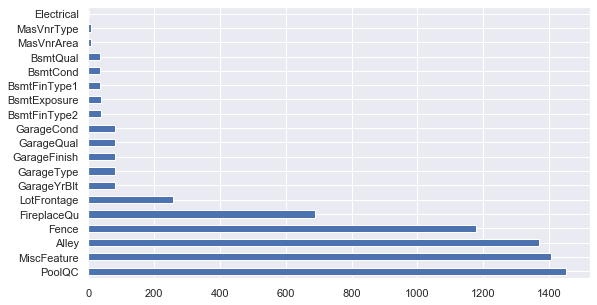

In [18]:
# find missing values
missing = train_clean.isnull().sum()
missing[missing>0].sort_values(ascending=False).plot.barh(figsize=(9,5));

In [19]:
#plt.figure(figsize=(9,5))
#plt.barh(missing[missing>0].sort_values(ascending=False).index,
#         missing[missing>0].sort_values(ascending=False).values);

In [20]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

#https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

In [21]:
missing_table = missing_values_table(train_clean)
missing_table

Your selected dataframe has 80 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


In [22]:
train_clean[train_clean.PoolQC.notnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,2Story,8,4,1918,1990,Gable,CompShg,Stucco,Stucco,None,0.0,Gd,Gd,PConc,TA,TA,No,GLQ,1036,LwQ,184,140,1360,GasA,Gd,Y,SBrkr,1360,1360,392,3112,1,1,2,0,4,1,Gd,8,Typ,1,Ex,Detchd,1918.0,Unf,2,795,TA,TA,Y,0,16,552,0,0,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
810,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1974,1999,Hip,CompShg,HdBoard,HdBoard,BrkFace,99.0,TA,TA,CBlock,TA,TA,No,ALQ,663,LwQ,377,0,1040,GasA,Fa,Y,SBrkr,1309,0,0,1309,1,0,1,1,3,1,Gd,5,Typ,1,Fa,Attchd,1974.0,RFn,2,484,TA,TA,Y,265,0,0,0,0,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1170,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Av,ALQ,522,Unf,0,574,1096,GasA,TA,Y,SBrkr,1118,0,0,1118,1,0,1,0,3,1,TA,6,Typ,1,Po,Attchd,1977.0,Fin,1,358,TA,TA,Y,203,0,0,0,0,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1182,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1386,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,RRAn,Norm,1Fam,2Story,7,5,1978,1978,Gable,CompShg,Plywood,Plywood,BrkFace,184.0,TA,TA,CBlock,Gd,TA,No,BLQ,790,LwQ,469,133,1392,GasA,TA,Y,SBrkr,1392,1392,0,2784,1,0,3,1,5,1,Gd,12,Typ,2,TA,Attchd,1978.0,RFn,2,564,TA,TA,Y,0,112,0,0,440,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,SLvl,6,7,1966,1966,Flat,Tar&Grv,Plywood,Plywood,None,0.0,Gd,Gd,CBlock,Gd,TA,Av,Unf,0,Unf,0,697,697,GasA,TA,Y,SBrkr,1575,626,0,2201,0,0,2,0,4,1,Gd,8,Typ,1,Gd,Attchd,1966.0,Unf,2,432,Gd,Gd,Y,586,236,0,0,0,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


We see that some features have a big amount of NaN values. For pool NaN indicates the absense of pool and is not actually a missing value. Similarly for most of the other features.

### Handle missing values

#### PoolQC

NaN indicates no pool. 99.5% of the houses do not have a pool. So, dropping the value is probably the best option.

First, I will replace NaN with 'None' and see the correlation with the sale price.

In [23]:
train_clean.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [24]:
train_clean['PoolQC'].replace({np.NaN: 'None'}, inplace=True)

In [25]:
train_clean.PoolQC.unique()

array(['None', 'Ex', 'Fa', 'Gd'], dtype=object)

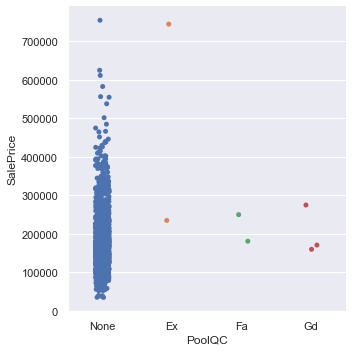

In [26]:
sns.catplot(x='PoolQC', y='SalePrice', data=train_clean);

We see that only a few houses have swimming pools and they are not playing really an important role at the price, except of one outlier value (orange color). I will drop the PoolQC column.

In [27]:
train_clean.drop('PoolQC', axis=1, inplace=True)

#### MiscFeature

NaN values indicate absence of misc feature. I will follow a similar handling as with the pool quality feature.

In [28]:
train_clean.MiscFeature.unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [29]:
train_clean['MiscFeature'].replace({np.NaN: 'None'}, inplace=True)
train_clean.MiscFeature.unique()

array(['None', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

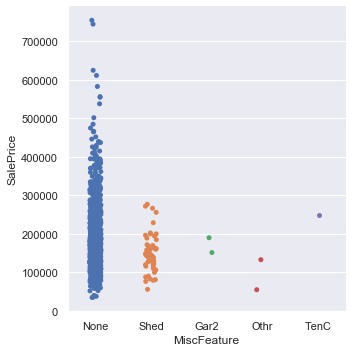

In [30]:
sns.catplot(x='MiscFeature', y='SalePrice', data=train_clean);

In [31]:
train_clean.drop('MiscFeature', axis=1, inplace=True)

#### Alley

NaN indicates no allay access.

In [32]:
train_clean.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [33]:
train_clean['Alley'] = train_clean['Alley'].fillna('None')
train_clean.Alley.unique()

array(['None', 'Grvl', 'Pave'], dtype=object)

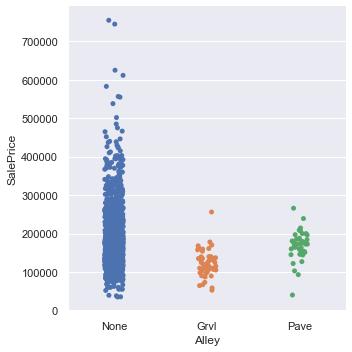

In [34]:
sns.catplot(x='Alley', y='SalePrice', data=train_clean);

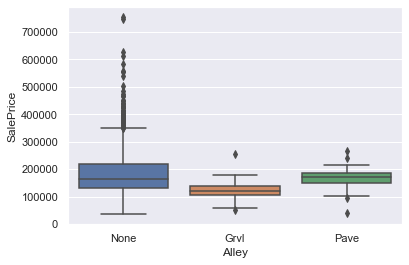

In [35]:
sns.boxplot(x='Alley', y='SalePrice', data=train_clean);

It looks like the median value of paved alley is a bit higher than no alley. Gravel alley has the lowest mediav value. It does not look like having an alley has an important contribution to the sale price. And since about 94% of the records have no alley I will drop the feature. Before doing that let's have a look at the mean values also.

In [36]:
train_clean.groupby('Alley').mean().SalePrice.sort_values(ascending=False)

Alley
None    183452.131483
Pave    168000.585366
Grvl    122219.080000
Name: SalePrice, dtype: float64

It looks like that the mean value is higher for the houses with no alleys. I will drop the Alley column.

In [37]:
train_clean.drop('Alley', axis=1, inplace=True)

#### Fence

NaN values indicate no fence.

In [38]:
train_clean.Fence.unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [39]:
train_clean.Fence.fillna('None', inplace=True)
train_clean.Fence.unique()

array(['None', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

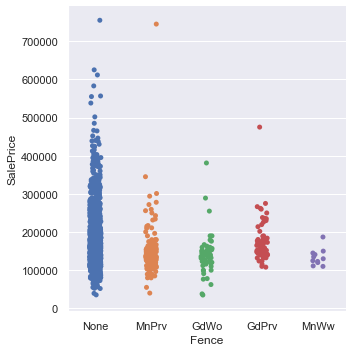

In [40]:
sns.catplot(x='Fence', y='SalePrice', data=train_clean);

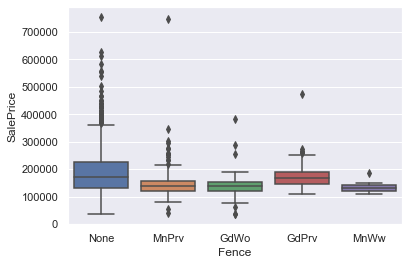

In [41]:
sns.boxplot(x='Fence', y='SalePrice', data=train_clean);

It also looks that the fence feature does not really affect the sale price compared to the houses with no fence. I will also drop the fence column since more than 80% of the houses do not have a fence.

In [42]:
train_clean.drop('Fence', axis=1, inplace=True)

#### FireplaceQu

NaN indicates no fireplace. About half of the houses do not have a fireplace.

In [43]:
train_clean.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [44]:
train_clean.FireplaceQu.notnull().sum()

770

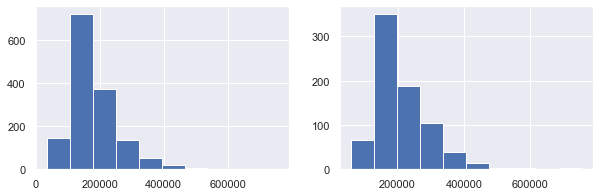

In [45]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
train_clean.SalePrice.hist(bins=10)
plt.subplot(1,2,2)
train_clean[train_clean.FireplaceQu.notnull()].SalePrice.hist(bins=10);

We see that the sale price when we include the NaN values has a very similar distribution to the sale price when the NaN values are not included.

In [46]:
train_clean.FireplaceQu.fillna('None', inplace=True)
train_clean.FireplaceQu.unique()

array(['None', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

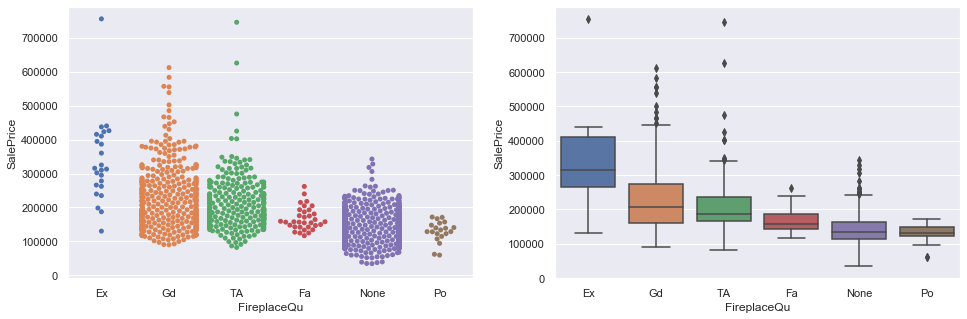

In [47]:
aa = train_clean.groupby('FireplaceQu').median().SalePrice.sort_values(ascending=False).index
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.swarmplot(x='FireplaceQu', y='SalePrice', data=train_clean, order=aa)
plt.subplot(1,2,2)
sns.boxplot(x='FireplaceQu', y='SalePrice', data=train_clean, order=aa);

We see that having a fireplace does affect the sale price of the house. It is only when the quality of the fireplace is poor that the median sale price of the houses with no fireplace is slightly higher than those of having a fireplace with poor quality. The majority of the houses with fireplace have higher median sale prices compared to those without a fireplace. I will thus keep that feature in my analysis.

#### LotFrontage

This is the linear feet of street connected to property. About 18% of the values are NaN. Houses in same neighborhood likely have similar lot frontage. I can impute the median lot frontage of the neighborhood to the NaN values.

In [48]:
train_clean.LotFrontage.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [49]:
# There are no missing neighborhood values
train_clean.Neighborhood.isnull().sum()

0

In [50]:
train_clean.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [51]:
train_clean[train_clean.Neighborhood=='CollgCr'].LotFrontage.sort_values()

847      36.0
850      36.0
1422     37.0
1078     37.0
1237     41.0
435      43.0
213      43.0
832      44.0
1369     48.0
815      48.0
1331     55.0
376      57.0
536      57.0
1047     57.0
194      60.0
464      60.0
952      60.0
396      60.0
1307     60.0
89       60.0
59       60.0
1316     61.0
1282     61.0
802      63.0
933      63.0
1444     63.0
428      64.0
1402     64.0
590      64.0
670      64.0
        ...  
36      112.0
302     118.0
290     120.0
150     120.0
1339    120.0
963     122.0
43        NaN
64        NaN
203       NaN
214       NaN
518       NaN
539       NaN
593       NaN
610       NaN
612       NaN
690       NaN
721       NaN
811       NaN
856       NaN
879       NaN
911       NaN
928       NaN
983       NaN
1033      NaN
1037      NaN
1318      NaN
1342      NaN
1354      NaN
1368      NaN
1441      NaN
Name: LotFrontage, Length: 150, dtype: float64

In [52]:
# check one neightborhood
train_clean[train_clean.Neighborhood=='CollgCr'].LotFrontage.median()

70.0

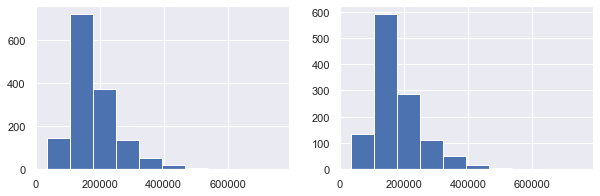

In [53]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
train_clean.SalePrice.hist(bins=10)
plt.subplot(1,2,2)
train_clean[train_clean.LotFrontage.notnull()].SalePrice.hist(bins=10);

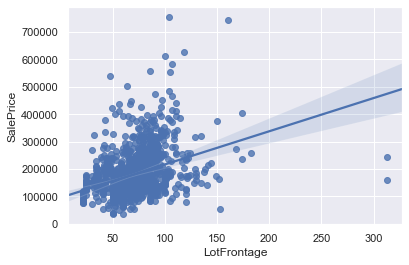

In [54]:
sns.regplot(x='LotFrontage', y='SalePrice', data=train_clean);

In [55]:
train_clean[['LotFrontage', 'SalePrice']].corr()

,LotFrontage,SalePrice
LotFrontage,1.000000,0.351799
SalePrice,0.351799,1.000000


It looks like there is a weak correlation between lot frontage and sale price. Imputing the missing values with the median lot frontage for each neighborhood should be a good option. We could also drop completely that feature since the correlation with the sale price is weak.

In [56]:
#for i in train_clean.Neighborhood.unique():
#    train_clean[train_clean.Neighborhood==i]['LotFrontage'].fillna(
#        train_clean[train_clean.Neighborhood==i]['LotFrontage'].median(), inplace=True)

In [57]:
train_clean['LotFrontage'] = train_clean.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

In [58]:
train_clean.LotFrontage.isnull().sum()

0

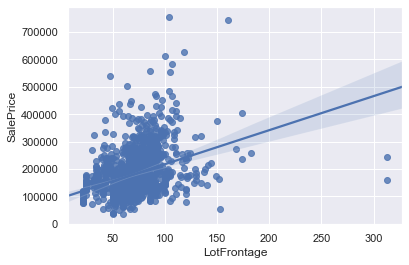

In [59]:
sns.regplot(x='LotFrontage', y='SalePrice', data=train_clean);

In [60]:
train_clean[['LotFrontage', 'SalePrice']].corr()

,LotFrontage,SalePrice
LotFrontage,1.000000,0.349876
SalePrice,0.349876,1.000000


After imputing the median values we see the the correlation between the lot frontage and the price sale is almost the same.

#### Garaze features

- GarageType
- GarageYrBlt
- GarageFinish
- GarageQual
- GarageCond

All the garage features have 81 missing values, 5.5% of the total values.

NaN values indicate no garage. There are also more garage variables, the garage area and the garage cars. I assume that there should be 81 zero values for those features.

I will replace NaN to 'None' and for the year build NaN to zero.

In [61]:
(train_clean.GarageArea==0).sum(), (train_clean.GarageCars==0).sum()

(81, 81)

In [62]:
train_clean.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [63]:
train_clean.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [64]:
train_clean.GarageQual.unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [65]:
train_clean.GarageCond.unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [66]:
train_clean.GarageYrBlt.unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [67]:
train_clean.GarageType.fillna('None', inplace=True)
train_clean.GarageFinish.fillna('None', inplace=True)
train_clean.GarageQual.fillna('None', inplace=True)
train_clean.GarageCond.fillna('None', inplace=True)
train_clean.GarageYrBlt.fillna(0, inplace=True)

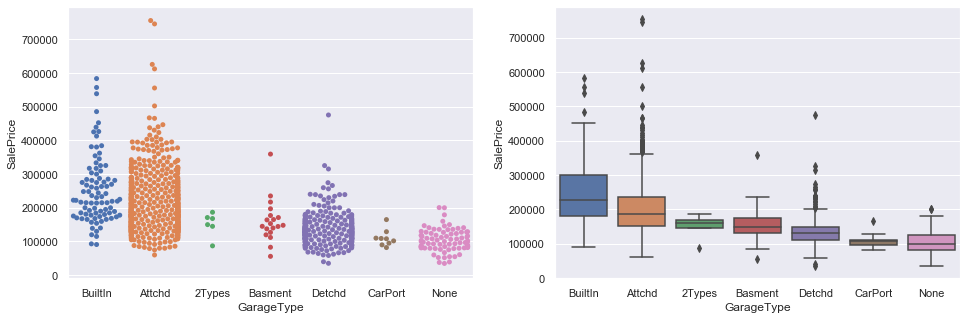

In [68]:
aa = train_clean.groupby('GarageType').median().SalePrice.sort_values(ascending=False).index
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.swarmplot(x='GarageType', y='SalePrice', data=train_clean, order=aa)
plt.subplot(1,2,2)
sns.boxplot(x='GarageType', y='SalePrice', data=train_clean, order=aa);

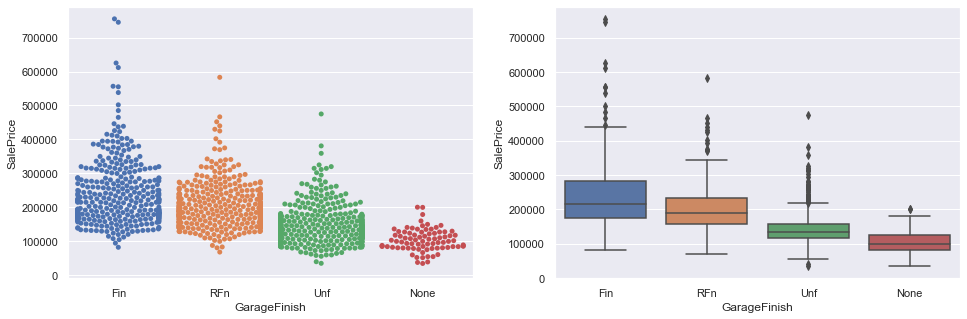

In [69]:
aa = train_clean.groupby('GarageFinish').median().SalePrice.sort_values(ascending=False).index
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.swarmplot(x='GarageFinish', y='SalePrice', data=train_clean, order=aa)
plt.subplot(1,2,2)
sns.boxplot(x='GarageFinish', y='SalePrice', data=train_clean, order=aa);

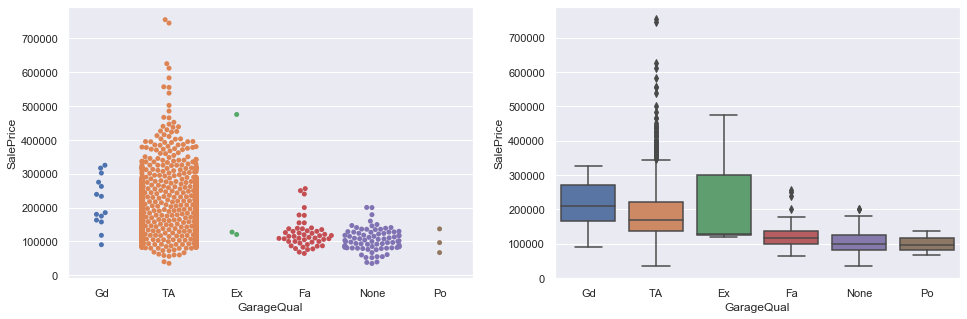

In [70]:
aa = train_clean.groupby('GarageQual').median().SalePrice.sort_values(ascending=False).index
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.swarmplot(x='GarageQual', y='SalePrice', data=train_clean, order=aa)
plt.subplot(1,2,2)
sns.boxplot(x='GarageQual', y='SalePrice', data=train_clean, order=aa);

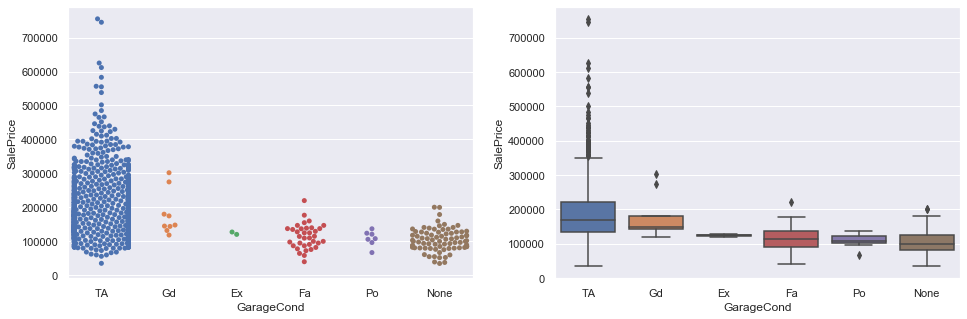

In [71]:
aa = train_clean.groupby('GarageCond').median().SalePrice.sort_values(ascending=False).index
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.swarmplot(x='GarageCond', y='SalePrice', data=train_clean, order=aa)
plt.subplot(1,2,2)
sns.boxplot(x='GarageCond', y='SalePrice', data=train_clean, order=aa);

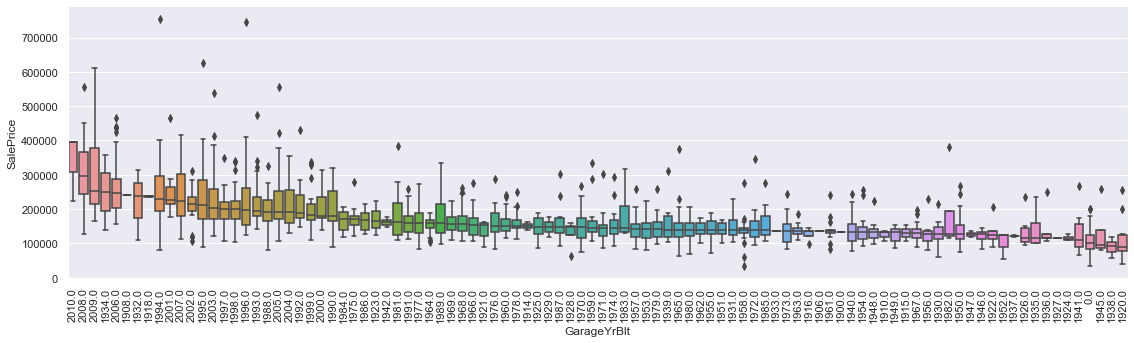

In [72]:
aa = train_clean.groupby('GarageYrBlt').median().SalePrice.sort_values(ascending=False).index
plt.figure(figsize=(19,5))
sns.boxplot(x='GarageYrBlt', y='SalePrice', data=train_clean, order=aa)
plt.xticks(rotation=90);

It looks like having a garage indeed affects the sale price of the house. Thus, I will keep these features in the dataset.

#### Basement features

- BsmtExposure	38	2.6
- BsmtFinType2	38	2.6
- BsmtFinType1	37	2.5
- BsmtCond	37	2.5
- BsmtQual	37	2.5

Again NaN indicates the no basement.

We see that 2 basement features have 38 missing values while the rest have 37. This is because of some **consistency issues**. These basements are actually unfinshed and not absent (see below).

In [73]:
train_clean[train_clean.BsmtExposure.isnull()].index

Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  948,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179,
            1216, 1218, 1232, 1321, 1412],
           dtype='int64')

In [74]:
train_clean[train_clean.BsmtFinType1.isnull()].index

Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412],
           dtype='int64')

In [75]:
train_clean[train_clean.BsmtFinType2.isnull()].index

Int64Index([  17,   39,   90,  102,  156,  182,  259,  332,  342,  362,  371,
             392,  520,  532,  533,  553,  646,  705,  736,  749,  778,  868,
             894,  897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179,
            1216, 1218, 1232, 1321, 1412],
           dtype='int64')

In [76]:
train_clean[train_clean.BsmtExposure.isnull()][train_clean[train_clean.BsmtExposure.isnull()].index==948]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,60,RL,65.0,14006,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0,Unf,0,936,936,GasA,Ex,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2,474,TA,TA,Y,144,96,0,0,0,0,0,2,2006,WD,Normal,192500


In [77]:
train_clean[train_clean.BsmtFinType2.isnull()][train_clean[train_clean.BsmtFinType2.isnull()].index==332]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,20,RL,85.0,10655,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,0,10,2009,WD,Normal,284000


Let's look if there are other discrepancies.

In [78]:
train_clean[((train_clean.BsmtExposure.isnull()) | (train_clean.BsmtFinType1.isnull())
            | (train_clean.BsmtFinType2.isnull()) | (train_clean.BsmtCond.isnull())
            | (train_clean.BsmtQual.isnull())) & (train_clean.TotalBsmtSF>0)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,20,RL,85.0,10655,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,0,10,2009,WD,Normal,284000
948,60,RL,65.0,14006,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0,Unf,0,936,936,GasA,Ex,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2,474,TA,TA,Y,144,96,0,0,0,0,0,2,2006,WD,Normal,192500


It is actually these 2 cases above that have a basement that is incomplete but is recorded as absent. I will manually fix these 2 instances. 

In [79]:
train_clean.loc[train_clean.index==332, 'BsmtFinType2'] = 'Unf'

In [80]:
# also change BsmtFinType1 so that it is in descrepancy with the rest unfinished basements in dataset.
train_clean.loc[train_clean.index==332, 'BsmtFinType1'] = 'Unf'

In [81]:
train_clean.BsmtExposure.mode()

0    No
dtype: object

In [82]:
# for the second instance replace BsmtExposure NaN with the mode value.
train_clean.loc[train_clean.index==948, 'BsmtExposure'] = 'No'

In [83]:
# check if the values have been fixed as itended.
train_clean[(train_clean.index==332) | (train_clean.index==948)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,20,RL,85.0,10655,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,Unf,1124,Unf,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,0,10,2009,WD,Normal,284000
948,60,RL,65.0,14006,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,936,936,GasA,Ex,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2,474,TA,TA,Y,144,96,0,0,0,0,0,2,2006,WD,Normal,192500


Check for further descrepancies.

In [84]:
# It looks like there are also the square feets of each basement splitted in 2 types of finished and unfinished
# square feet and the total basement square feets. Adding them all together should equal the total square feets.
(train_clean.BsmtFinSF1+train_clean.BsmtFinSF2+train_clean.BsmtUnfSF==train_clean.TotalBsmtSF).any()

True

In [85]:
# check if there are other completely unfinished basements
len(train_clean[(train_clean.BsmtUnfSF==train_clean.TotalBsmtSF) & (train_clean.TotalBsmtSF>0)])

430

Indeed we see that there are also other completely unfinshed basements and not only the aforementioned.

In [86]:
train_clean[(train_clean.BsmtUnfSF==train_clean.TotalBsmtSF) & (train_clean.TotalBsmtSF>0)].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900
13,20,RL,91.0,10652,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,Stone,306.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1494,1494,GasA,Ex,Y,SBrkr,1494,0,0,1494,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,3,840,TA,TA,Y,160,33,0,0,0,0,0,8,2007,New,Partial,279500
15,45,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,7,8,1929,2001,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,832,832,GasA,Ex,Y,FuseA,854,0,0,854,0,0,1,0,2,1,TA,5,Typ,0,None,Detchd,1991.0,Unf,2,576,TA,TA,Y,48,112,0,0,0,0,0,7,2007,WD,Normal,132000
20,60,RL,101.0,14215,Pave,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,380.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1158,1158,GasA,Ex,Y,SBrkr,1158,1218,0,2376,0,0,3,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2005.0,RFn,3,853,TA,TA,Y,240,154,0,0,0,0,0,11,2006,New,Partial,325300
21,45,RM,57.0,7449,Pave,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Unf,7,7,1930,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,637,637,GasA,Ex,Y,FuseF,1108,0,0,1108,0,0,1,0,3,1,Gd,6,Typ,1,Gd,Attchd,1930.0,Unf,1,280,TA,TA,N,0,0,205,0,0,0,0,6,2007,WD,Normal,139400


Now let's fix the rest of the NaN values.

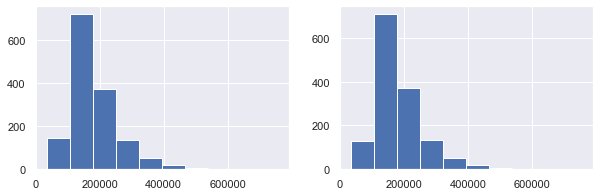

In [87]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
train_clean.SalePrice.hist(bins=10)
plt.subplot(1,2,2)
train_clean[train_clean.BsmtExposure.notnull()].SalePrice.hist(bins=10);

We see that the distribution of the sale price is the same for the features with and without a basement for the exposure feature. So, dropping these rows shouldn't really affect our analysis, since it is a small percentage of the overall dataset (2.5%).

However, since the dataset is not that big I will keep them in the analysis replacing the NaNs with 'None'.

In [88]:
train_clean.BsmtExposure.fillna('None', inplace=True)
train_clean.BsmtFinType2.fillna('None', inplace=True)
train_clean.BsmtFinType1.fillna('None', inplace=True)
train_clean.BsmtCond.fillna('None', inplace=True)
train_clean.BsmtQual.fillna('None', inplace=True)

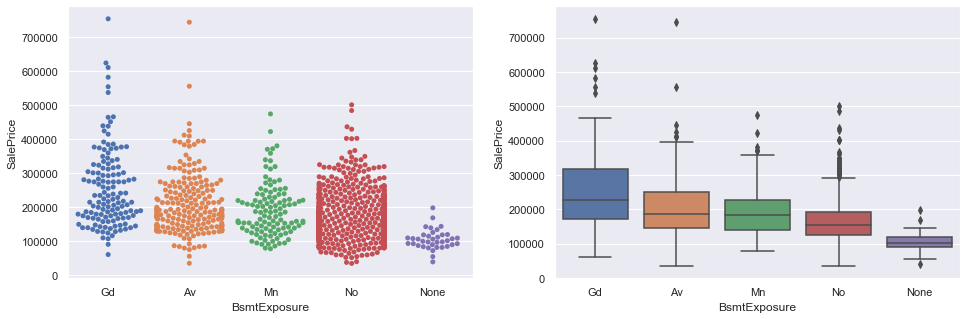

In [89]:
aa = train_clean.groupby('BsmtExposure').median().SalePrice.sort_values(ascending=False).index
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.swarmplot(x='BsmtExposure', y='SalePrice', data=train_clean, order=aa)
plt.subplot(1,2,2)
sns.boxplot(x='BsmtExposure', y='SalePrice', data=train_clean, order=aa);

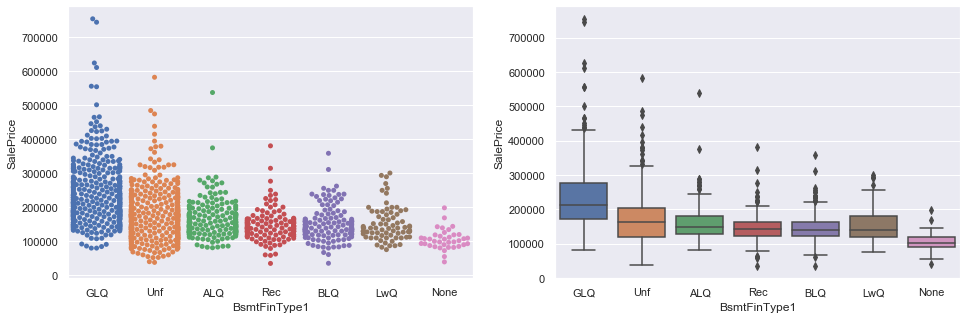

In [90]:
aa = train_clean.groupby('BsmtFinType1').median().SalePrice.sort_values(ascending=False).index
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.swarmplot(x='BsmtFinType1', y='SalePrice', data=train_clean, order=aa)
plt.subplot(1,2,2)
sns.boxplot(x='BsmtFinType1', y='SalePrice', data=train_clean, order=aa);

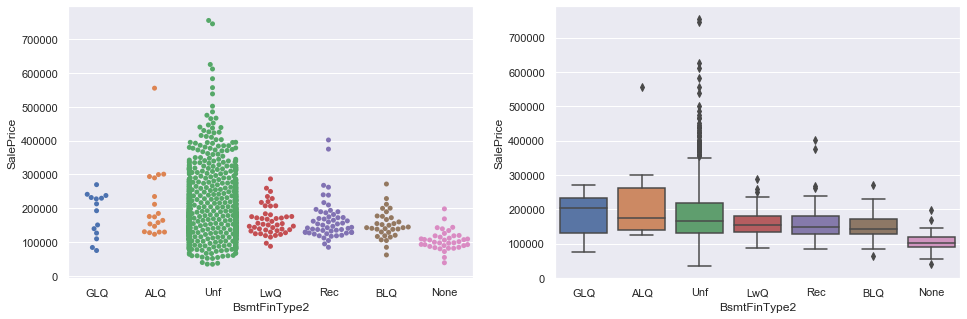

In [91]:
aa = train_clean.groupby('BsmtFinType2').median().SalePrice.sort_values(ascending=False).index
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.swarmplot(x='BsmtFinType2', y='SalePrice', data=train_clean, order=aa)
plt.subplot(1,2,2)
sns.boxplot(x='BsmtFinType2', y='SalePrice', data=train_clean, order=aa);

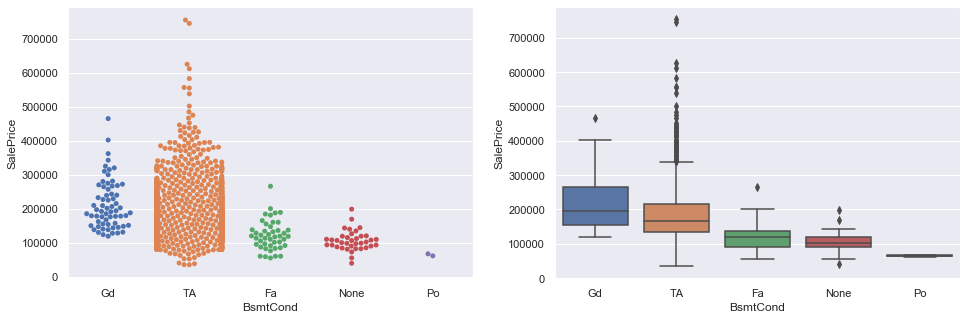

In [92]:
aa = train_clean.groupby('BsmtCond').median().SalePrice.sort_values(ascending=False).index
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.swarmplot(x='BsmtCond', y='SalePrice', data=train_clean, order=aa)
plt.subplot(1,2,2)
sns.boxplot(x='BsmtCond', y='SalePrice', data=train_clean, order=aa);

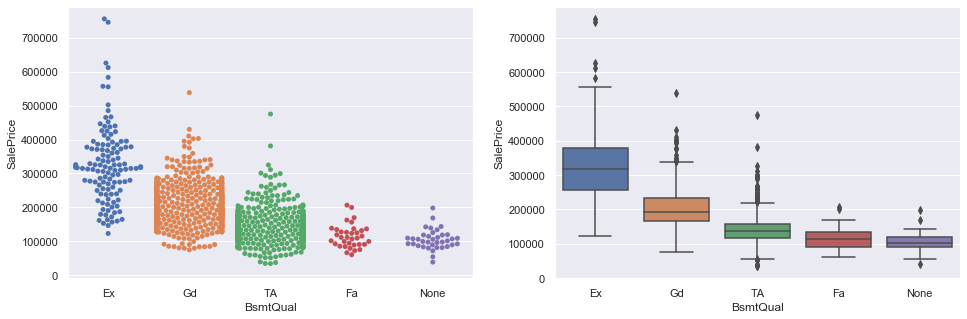

In [93]:
aa = train_clean.groupby('BsmtQual').median().SalePrice.sort_values(ascending=False).index
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.swarmplot(x='BsmtQual', y='SalePrice', data=train_clean, order=aa)
plt.subplot(1,2,2)
sns.boxplot(x='BsmtQual', y='SalePrice', data=train_clean, order=aa);

#### Masonry veneer type, area and electrical system

- MasVnrArea	8
- MasVnrType	8
- Electrical	1

For the masonry variables I will replace NaN with 'None' and for the electrical system with 1 missing value I will impute the mode.

In [94]:
train_clean.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

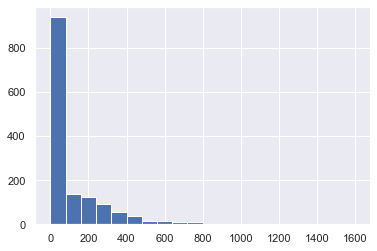

In [95]:
train_clean.MasVnrArea.hist(bins=20);

In [96]:
train_clean.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [97]:
train_clean.Electrical.mode()[0]

'SBrkr'

In [98]:
train_clean.MasVnrArea.fillna(0, inplace=True)
train_clean.MasVnrType.fillna('None', inplace=True)
train_clean.Electrical.fillna('SBrkr', inplace=True)

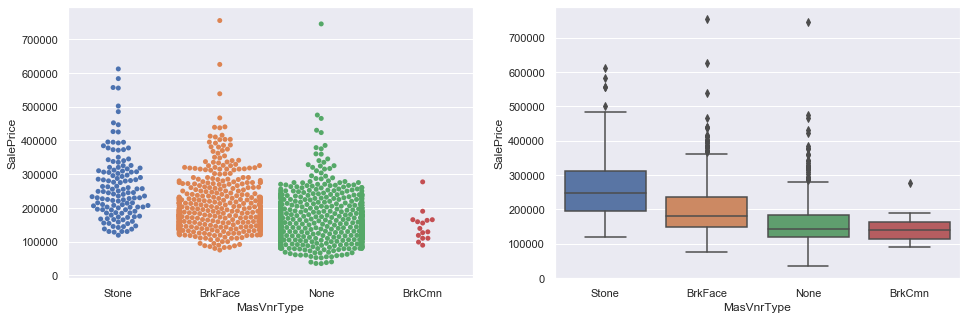

In [99]:
aa = train_clean.groupby('MasVnrType').median().SalePrice.sort_values(ascending=False).index
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.swarmplot(x='MasVnrType', y='SalePrice', data=train_clean, order=aa)
plt.subplot(1,2,2)
sns.boxplot(x='MasVnrType', y='SalePrice', data=train_clean, order=aa);

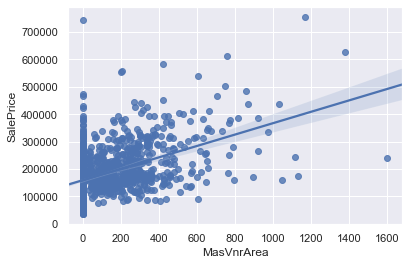

In [100]:
sns.regplot(x='MasVnrArea', y='SalePrice', data=train_clean);

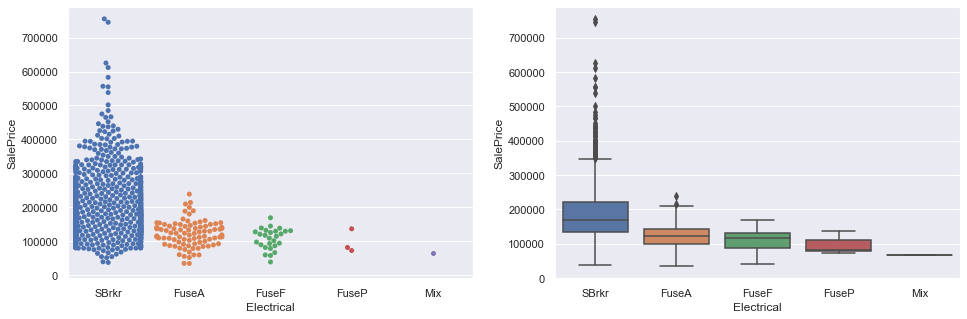

In [101]:
aa = train_clean.groupby('Electrical').median().SalePrice.sort_values(ascending=False).index
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.swarmplot(x='Electrical', y='SalePrice', data=train_clean, order=aa)
plt.subplot(1,2,2)
sns.boxplot(x='Electrical', y='SalePrice', data=train_clean, order=aa);

In [105]:
# check if the missing values have all been treated
train_clean.isnull().sum().any()

False

In [106]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

In [150]:
train_clean.shape

(1460, 76)

### Duplicates

In [107]:
# find duplicates
train_clean.duplicated().sum()

0

#### Numeric Data

In [108]:
train_numeric = train_clean.select_dtypes(include=np.number)
train_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


#### Non-numeric Data

In [109]:
train_cat = train_clean.select_dtypes(exclude=np.number)
train_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


### Temporal Data

These are data related to time.

#### Yearly temporal Data

In [110]:
# list of features that contain temporal data related to year
year_attr = [attr for attr in train_clean.columns if 'Yr' in attr or 'Year' in attr]
year_attr

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [111]:
for attr in year_attr:
    print(attr, '\n' ,train_clean[attr].unique())

YearBuilt 
 [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd 
 [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt 
 [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962.

In [112]:
train_clean.YearBuilt.min(), train_clean.YearBuilt.max()

(1872, 2010)

#### Distributions of the yearly temporal data

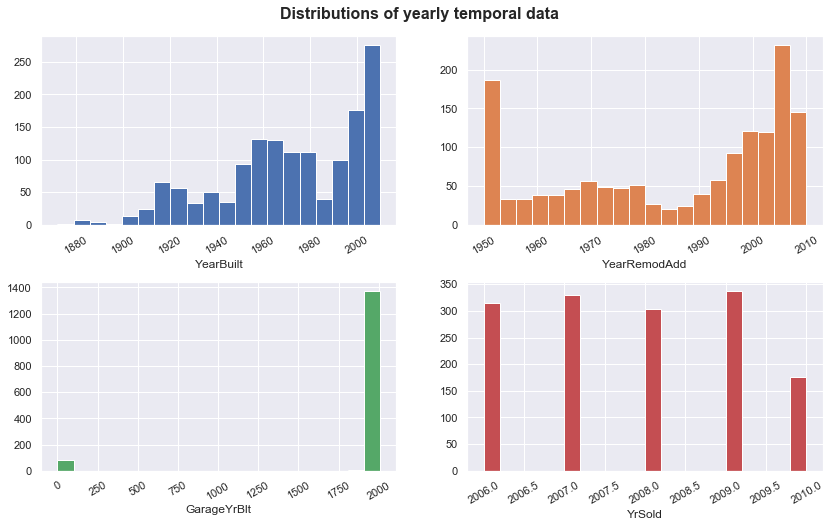

In [113]:
i = 0
j = 0
k = 0
fig, ax = plt.subplots(2,2, figsize=(14,8))
fig.suptitle('Distributions of yearly temporal data', fontsize=16, fontweight = 'bold', y=0.93)
fig.subplots_adjust(hspace=0.3)
for attr in year_attr:
    ax[i,j].hist(train_clean[attr], bins=20, color=sns.color_palette()[k])
    ax[i,j].set_xlabel(attr)
    ax[i,j].tick_params('x', labelrotation=30)
    if j==1:
        i+=1
        j=0
    else:
        j+=1
    k+=1

Year Remodeling:
- We can see a lot of remodeling the year 1950. Maybe some new regulations took place at 1950 and older houses had to be renovated?

Garaze Year Built:
- We can see a sudden drop after 1980. We also see a sudden drop at the Year Built which can explain that sudden drop.

#### Relationship of yearly temporal data with sale price

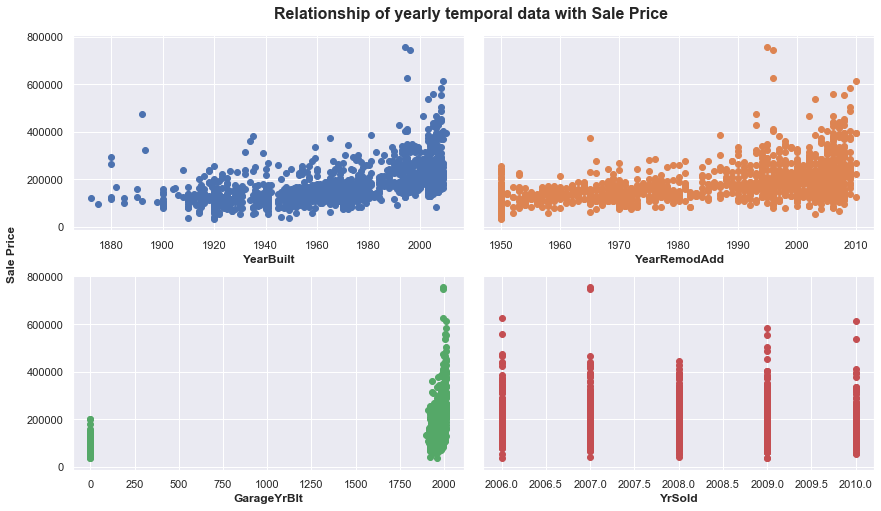

In [114]:
i = 0
j = 0
k = 0
fig, ax = plt.subplots(2,2, figsize=(14,8), sharey=True)
fig.suptitle('Relationship of yearly temporal data with Sale Price', fontsize=16, fontweight='bold', y=0.93)
fig.subplots_adjust(hspace=0.23, wspace=0.05, left=0.105)
fig.text(0.04, 0.5, 'Sale Price', va='center', rotation=90, fontdict={'fontsize':12, 'fontweight':'bold'})
for attr in year_attr:
    ax[i,j].scatter(train_clean[attr], train_clean['SalePrice'], color=sns.color_palette()[k])
    ax[i,j].set_xlabel(attr, fontsize=12, fontweight='bold')
    if j==1:
        i+=1
        j=0
    else:
        j+=1
    k+=1

**Notes**

We can see a slight positive correlation:
- Between YearBuilt and SalePrice
- Between GarazeYrBlt and SalePrice
- Between YearRemodAdd and SalePrice

We can see various outliers between the yearly temporal data and the sales price.
- Remove outliers.

#### Correlation of yearly temporal data with sale price

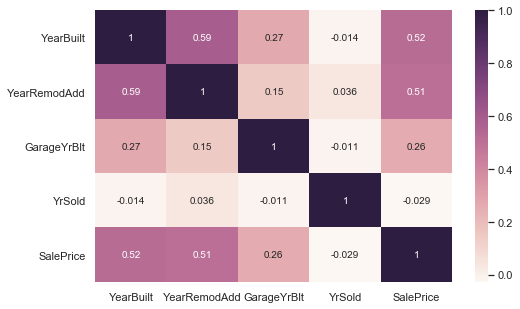

In [115]:
cmap = sns.cubehelix_palette(as_cmap=True, reverse=False, dark = 0.15, light = 0.97, hue = 0.9)
plt.figure(figsize=(8,5))
sns.heatmap(train_clean[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'SalePrice']].corr(), cmap=cmap, annot=True);

In [116]:
train_numeric.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

There is also another temporal feature: MoSold (Month Sold). Let's assess that.

#### Monthly temporal data

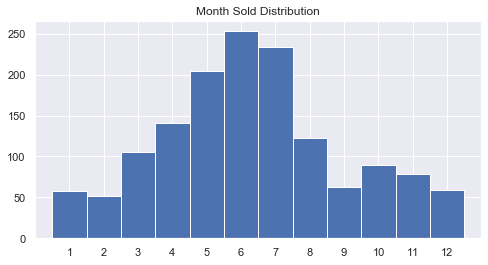

In [117]:
plt.figure(figsize=(8,4))
bins = np.arange(14)-0.5
plt.hist(train_clean.MoSold, bins)
plt.xticks(range(1,13))
plt.title('Month Sold Distribution')
plt.xlim([0, 13]);
#https://stackoverflow.com/questions/27083051/matplotlib-xticks-not-lining-up-with-histogram

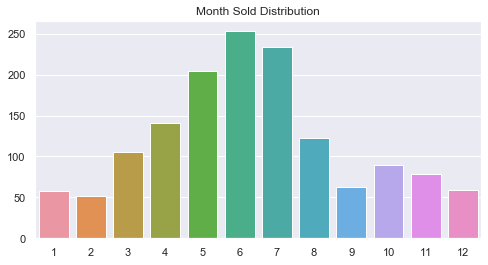

In [118]:
# Using seaborn instead
plt.figure(figsize=(8,4))
sns.countplot(train_clean.MoSold)
plt.title('Month Sold Distribution')
plt.ylabel('')
plt.xlabel('');

Most sales take place the months June and July, followed by May.

#### Relationship of monthly temporal data with sale price

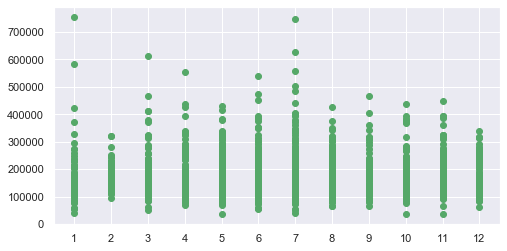

In [119]:
plt.figure(figsize=(8,4))
plt.scatter(train_clean['MoSold'], train_clean['SalePrice'], color=sns.color_palette()[2])
plt.xticks(range(1,13));

In [120]:
train_clean[['MoSold', 'SalePrice']].corr()

,MoSold,SalePrice
MoSold,1.000000,0.046432
SalePrice,0.046432,1.000000


There is no correlation between month sold and sale price.

### Numeric Data

Now, let's assess all the numeric data.

In [121]:
train_numeric.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

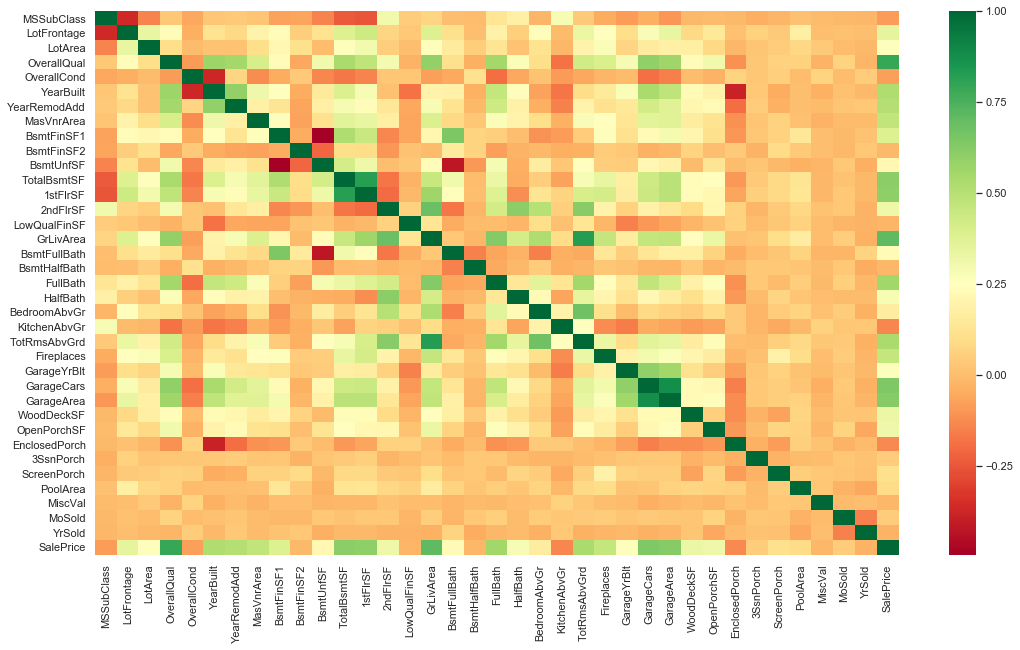

In [122]:
#cmap = sns.cubehelix_palette(as_cmap=True, reverse=False, dark = 0.15, light = 0.97, hue = 0.9)
#cmap = 'viridis'
cmap = 'RdYlGn'
plt.figure(figsize=(18,10))
sns.heatmap(train_numeric.corr(), cmap=cmap, annot=False);

#### Zoom in heatmap for numeric data

In [123]:
corr_numeric = train_numeric.corr()

In [124]:
#plt.figure(figsize=(12,6))
#sb.heatmap(corr_numeric[((corr_numeric>0.6) | (corr_numeric<-0.6)) & (corr_numeric!=1)]);

In [125]:
corr_numeric.sort_values('SalePrice').head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
KitchenAbvGr,0.281721,-0.005627,-0.017784,-0.183882,-0.087001,-0.174800,-0.149598,-0.038450,-0.081007,-0.040751,0.030086,-0.068901,0.068101,0.059306,0.007522,0.100063,-0.041503,-0.037944,0.133115,-0.068263,0.198597,1.000000,0.256045,-0.123936,-0.157991,-0.050634,-0.064433,-0.090130,-0.070091,0.037312,-0.024600,-0.051613,-0.014525,0.062341,0.026589,0.031687,-0.135907
EnclosedPorch,-0.012037,0.008057,-0.018340,-0.113937,0.070356,-0.387268,-0.193919,-0.109907,-0.102303,0.036543,-0.002538,-0.095478,-0.065292,0.061989,0.061081,0.009113,-0.049911,-0.008555,-0.115093,-0.095317,0.041570,0.037312,0.004151,-0.024822,-0.076822,-0.151434,-0.121777,-0.125989,-0.093079,1.000000,-0.037305,-0.082864,0.054203,0.018361,-0.028887,-0.009916,-0.128578


We see that the negative correlations with the Sale Price are very small. Now, let's check the positive correlations.

In [126]:
# sort correlation matrix by SalePrice descending
corr_numeric_high = corr_numeric.sort_values('SalePrice', ascending=False).head(11)
corr_numeric_high

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.084284,0.349876,0.263843,0.790982,-0.077856,0.522897,0.507101,0.472614,0.386420,-0.011378,0.214479,0.613581,0.605852,0.319334,-0.025606,0.708624,0.227122,-0.016844,0.560664,0.284108,0.168213,-0.135907,0.533723,0.466929,0.261366,0.640409,0.623431,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,0.032628,0.239546,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.288998,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.074853,0.385190,0.263116,0.593007,-0.079686,0.199010,0.287389,0.388052,0.208171,-0.009640,0.240257,0.454868,0.566024,0.687501,0.134683,1.000000,0.034836,-0.018918,0.630012,0.415772,0.521270,0.100063,0.825489,0.461679,0.162543,0.467247,0.468997,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,-0.040110,0.281393,0.154871,0.600671,-0.185758,0.537850,0.420622,0.361945,0.224054,-0.038264,0.214175,0.434585,0.439317,0.183926,-0.094480,0.467247,0.131881,-0.020891,0.469672,0.219178,0.086106,-0.050634,0.362289,0.300789,0.598005,1.000000,0.882475,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,-0.098672,0.339085,0.180403,0.562022,-0.151521,0.478954,0.371600,0.370884,0.296970,-0.018227,0.183303,0.486665,0.489782,0.138347,-0.067601,0.468997,0.179189,-0.024536,0.405656,0.163549,0.065253,-0.064433,0.337822,0.269141,0.560783,0.882475,1.000000,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.238518,0.381038,0.260833,0.537808,-0.171098,0.391452,0.291066,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.176359,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,-0.251758,0.434109,0.299475,0.476224,-0.144203,0.281986,0.240379,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.166642,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
FullBath,0.131608,0.186561,0.126031,0.550600,-0.194149,0.468271,0.439046,0.272999,0.058543,-0.076444,0.288886,0.323722,0.380637,0.421378,-0.000710,0.630012,-0.064512,-0.054536,1.000000,0.136381,0.363252,0.133115,0.554784,0.243671,0.137464,0.469672,0.405656,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.040380,0.332619,0.190015,0.427452,-0.057583,0.095589,0.191740,0.279568,0.044316,-0.035227,0.250647,0.285573,0.409516,0.616423,0.131185,0.825489,-0.053275,-0.023836,0.554784,0.343415,0.676620,0.256045,1.000000,0.326114,0.095607,0.362289,0.337822,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
YearBuilt,0.027850,0.120999,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.272029,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897


In [127]:
corr_numeric_high = corr_numeric_high[corr_numeric_high.index]
corr_numeric_high

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,0.507101
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600
TotalBsmtSF,0.613581,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066
1stFlrSF,0.605852,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379
FullBath,0.560664,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046
TotRmsAbvGrd,0.533723,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740
YearBuilt,0.522897,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855


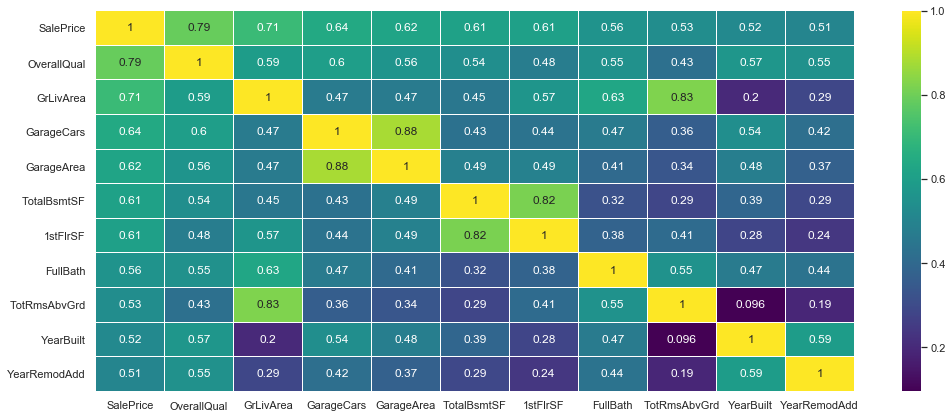

In [128]:
#cmap = sb.diverging_palette(240, 10, n=9)
#cmap = sb.cubehelix_palette()
cmap = 'viridis'
#cmap = 'RdYlGn'
plt.figure(figsize=(17,7))
sns.heatmap(corr_numeric_high,
           linewidths=0.01, linecolor='white', annot_kws = {'size':12}, annot=True, cmap=cmap);

We clearly see the highest correlations with the Sale Price.
- OverallQual: Overall Quality
- GrLivArea: Above grade (ground) living area square feet
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- TotalBsmtSF: Total square feet of basement area
- 1stFlrSF: First Floor square feet

#### Discrete attributes

***I will now explore the discrete attributes from the above list with the highest correlations.***

In [129]:
train_numeric[corr_numeric_high.index].head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,208500,7,1710,2,548,856,856,2,8,2003,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976
2,223500,7,1786,2,608,920,920,2,6,2001,2002
3,140000,7,1717,3,642,756,961,1,7,1915,1970
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000


In [130]:
discrete_attr_high = [attr for attr in train_numeric[corr_numeric_high.index].head().columns if len(train_numeric[corr_numeric_high.index][attr].unique())<25]
discrete_attr_high

['OverallQual', 'GarageCars', 'FullBath', 'TotRmsAbvGrd']

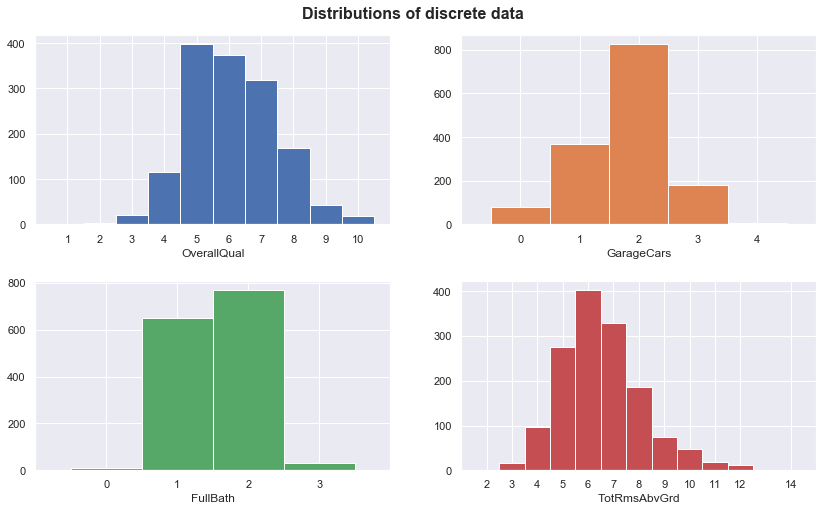

In [131]:
i = 0
j = 0
k = 0

fig, ax = plt.subplots(2,2, figsize=(14,8))
fig.suptitle('Distributions of discrete data', fontsize=16, fontweight = 'bold', y=0.93)
fig.subplots_adjust(hspace=0.3)
for attr in discrete_attr_high:
    bins = np.arange(len(train_clean[attr].unique())+2)-0.5
    ax[i,j].hist(train_clean[attr], bins=bins, color=sns.color_palette()[k])
    ax[i,j].set_xlabel(attr)
    ax[i,j].set_xticks(train_clean[attr].sort_values().unique())
    #ax[i,j].set_xticklabels(train_clean[attr].sort_values().unique())
    ax[i,j].set_xlim([train_clean[attr].unique().min()-1,train_clean[attr].unique().max()+1])
    if j==1:
        i+=1
        j=0
    else:
        j+=1
    k+=1

(1, 14)

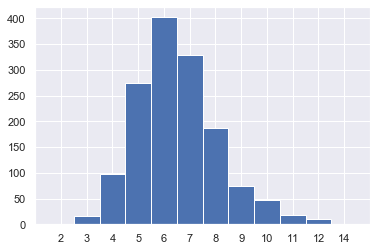

In [132]:
# Alternatively if I want to display all values next to each other.
bins = np.arange(2,16)-0.5
train_clean.TotRmsAbvGrd.hist(bins=bins)
plt.xticks(ticks=range(2,14), labels=train_clean['TotRmsAbvGrd'].sort_values().unique())
plt.xlim(1,14)

In [133]:
train_clean['TotRmsAbvGrd'].value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

#### Relationship of discrete data with sale price

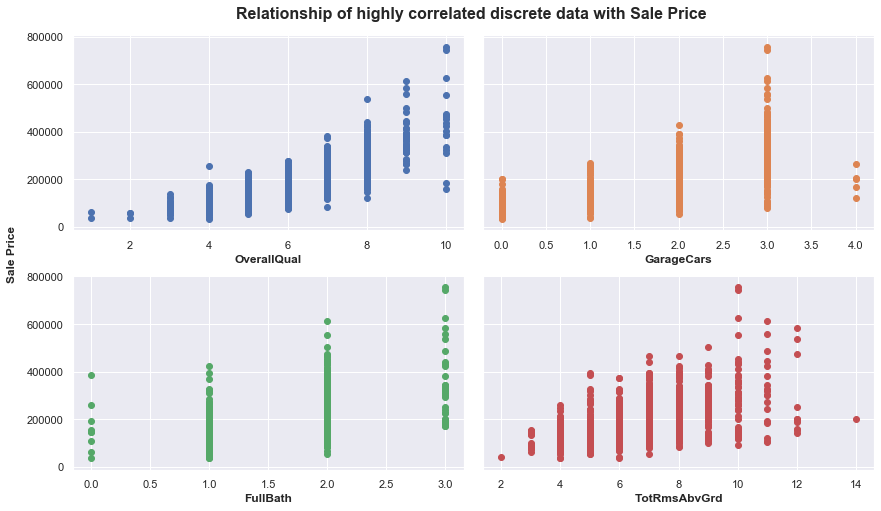

In [189]:
i = 0
j = 0
k = 0
fig, ax = plt.subplots(2,2, figsize=(14,8), sharey=True)
fig.suptitle('Relationship of highly correlated discrete data with Sale Price', fontsize=16, fontweight='bold', y=0.93)
fig.subplots_adjust(hspace=0.23, wspace=0.05, left=0.105)
fig.text(0.04, 0.5, 'Sale Price', va='center', rotation=90, fontdict={'fontsize':12, 'fontweight':'bold'})
for attr in discrete_attr_high:
    ax[i,j].scatter(train_clean[attr], train_clean['SalePrice'], color=sns.color_palette()[k])
    ax[i,j].set_xlabel(attr, fontsize=12, fontweight='bold')
    if j==1:
        i+=1
        j=0
    else:
        j+=1
    k+=1

We notice some outliers which we can remove or not.

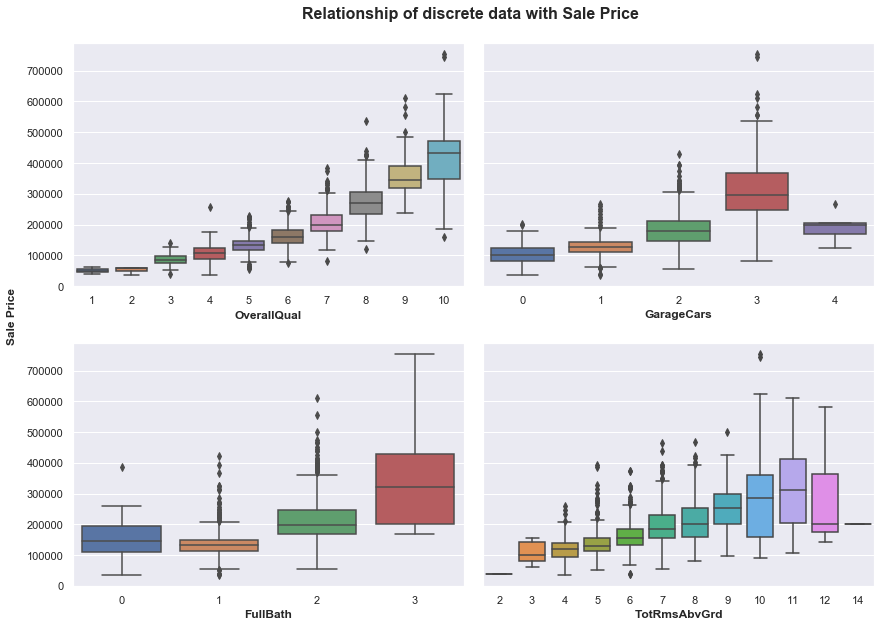

In [190]:
i = j = 0
fig, ax = plt.subplots(2,2, figsize=(14,10), sharey=True)
fig.suptitle('Relationship of discrete data with Sale Price', fontsize=16, fontweight='bold', y=0.93)
fig.subplots_adjust(hspace=0.23, wspace=0.05, left=0.105)
fig.text(0.04, 0.5, 'Sale Price', va='center', rotation=90, fontdict={'fontsize':12, 'fontweight':'bold'})
for attr in discrete_attr_high:
    sns.boxplot(x=attr, y='SalePrice', data=train_clean, ax=ax[i,j])
    ax[i,j].set_xlabel(attr, fontsize=12, fontweight='bold')
    ax[i,j].set_ylabel('')
    if j==1:
        i+=1
        j=0
    else:
        j+=1

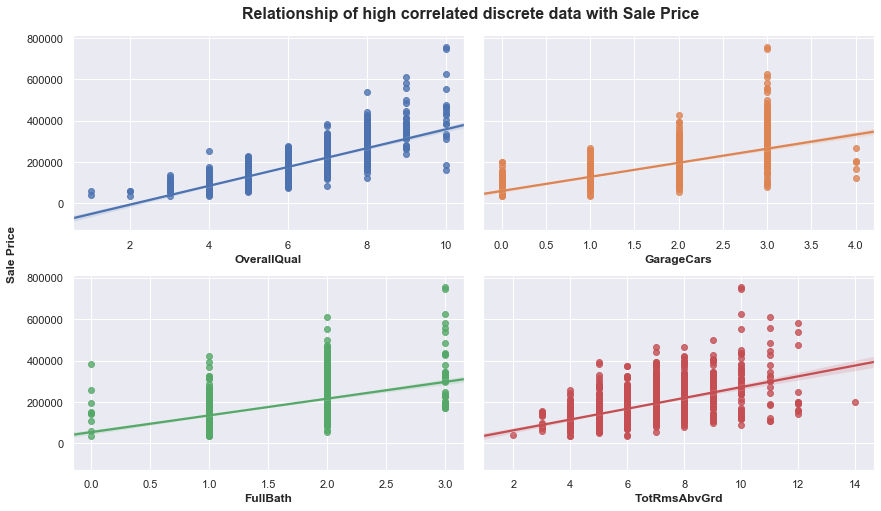

In [136]:
i = j = 0
fig, ax = plt.subplots(2,2, figsize=(14,8), sharey=True)
fig.suptitle('Relationship of high correlated discrete data with Sale Price', fontsize=16, fontweight='bold', y=0.93)
fig.subplots_adjust(hspace=0.23, wspace=0.05, left=0.105)
fig.text(0.04, 0.5, 'Sale Price', va='center', rotation=90, fontdict={'fontsize':12, 'fontweight':'bold'})
for attr in discrete_attr_high:
    sns.regplot(x=attr, y='SalePrice', data=train_clean, ax=ax[i,j])
    ax[i,j].set_xlabel(attr, fontsize=12, fontweight='bold')
    ax[i,j].set_ylabel('')
    if j==1:
        i+=1
        j=0
    else:
        j+=1

In [137]:
discrete_attr = [attr for attr in train_numeric.columns if len(train_numeric[attr].unique())<25]
discrete_attr

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [138]:
len(discrete_attr)

18

In [139]:
"""
i = j = 0
fig, ax = plt.subplots(6,3, figsize=(18,20), sharey=True)
fig.suptitle('Relationship of all discrete data with Sale Price', fontsize=16, fontweight='bold', y=0.9)
fig.subplots_adjust(hspace=0.23, wspace=0.05, left=0.105)
fig.text(0.04, 0.5, 'Sale Price', va='center', rotation=90, fontdict={'fontsize':12, 'fontweight':'bold'})
for attr in discrete_attr:
    sns.regplot(x=attr, y='SalePrice', data=train_clean, ax=ax[i,j])
    ax[i,j].set_xlabel(attr, fontsize=12, fontweight='bold')
    ax[i,j].set_ylabel('')
    ax[i,j].set_ylim(-70000,800000)
    if j==2:
        i+=1
        j=0
    else:
        j+=1
"""

"\ni = j = 0\nfig, ax = plt.subplots(6,3, figsize=(18,20), sharey=True)\nfig.suptitle('Relationship of all discrete data with Sale Price', fontsize=16, fontweight='bold', y=0.9)\nfig.subplots_adjust(hspace=0.23, wspace=0.05, left=0.105)\nfig.text(0.04, 0.5, 'Sale Price', va='center', rotation=90, fontdict={'fontsize':12, 'fontweight':'bold'})\nfor attr in discrete_attr:\n    sns.regplot(x=attr, y='SalePrice', data=train_clean, ax=ax[i,j])\n    ax[i,j].set_xlabel(attr, fontsize=12, fontweight='bold')\n    ax[i,j].set_ylabel('')\n    ax[i,j].set_ylim(-70000,800000)\n    if j==2:\n        i+=1\n        j=0\n    else:\n        j+=1\n"

#### Continuous data

In [140]:
continuous_attr = [attr for attr in train_numeric if attr not in discrete_attr]
continuous_attr

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [141]:
continuous_attr_high = [attr for attr in train_numeric[corr_numeric_high.index]
                        if attr not in discrete_attr+['SalePrice']] #+['SalePrice']
continuous_attr_high

['GrLivArea',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'YearBuilt',
 'YearRemodAdd']

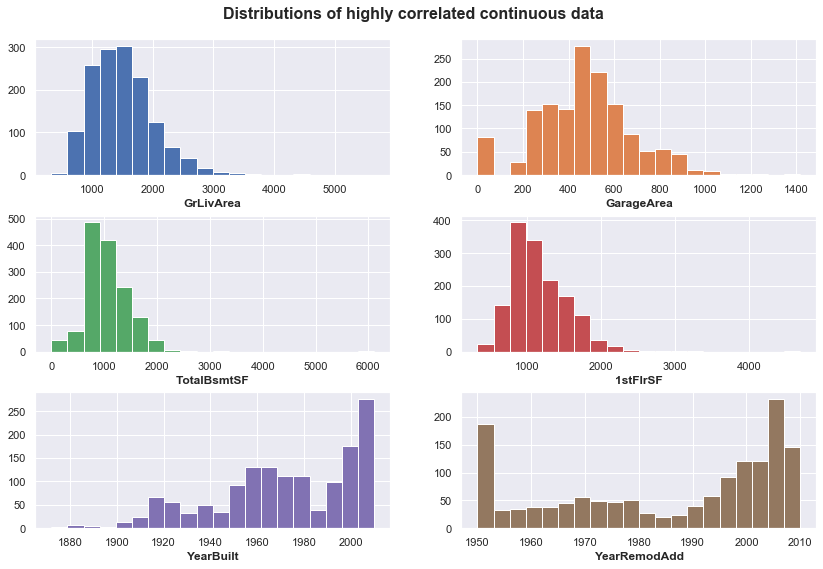

In [142]:
i = j = k = 0
fig, ax = plt.subplots(3,2, figsize=(14,9))
fig.suptitle('Distributions of highly correlated continuous data', fontsize=16, fontweight = 'bold', y=0.93)
fig.subplots_adjust(hspace=0.3)
for attr in continuous_attr_high:
    ax[i,j].hist(train_clean[attr], bins=20, color=sns.color_palette()[k])
    ax[i,j].set_xlabel(attr, fontsize=12, fontweight='bold')
    if j==1:
        i+=1
        j=0
    else:
        j+=1
    k+=1

#### Relationship of continuous data with sale price

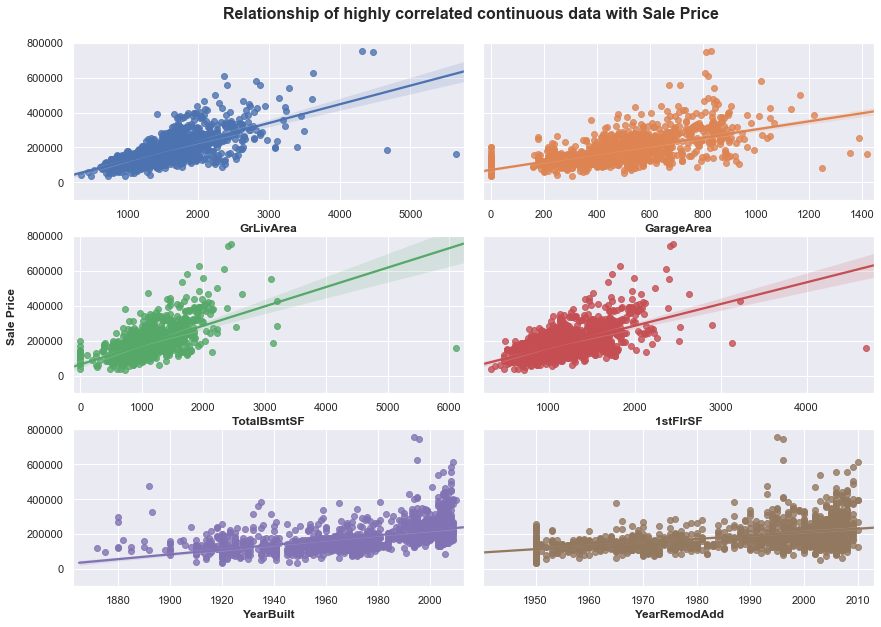

In [143]:
i = j = 0
fig, ax = plt.subplots(3,2, figsize=(14,10), sharey=True)
fig.suptitle('Relationship of highly correlated continuous data with Sale Price', fontsize=16, fontweight='bold', y=0.93)
fig.subplots_adjust(hspace=0.23, wspace=0.05, left=0.105)
fig.text(0.04, 0.5, 'Sale Price', va='center', rotation=90, fontdict={'fontsize':12, 'fontweight':'bold'})
for attr in continuous_attr_high:
    sns.regplot(x=attr, y='SalePrice', data=train_clean, ax=ax[i,j])
    ax[i,j].set_xlabel(attr, fontsize=12, fontweight='bold')
    ax[i,j].set_ylabel('')
    ax[i,j].set_ylim(-100000, 800000)
    if (train_clean[attr].max()-train_clean[attr].min())>500:
        ax[i,j].set_xlim(train_clean[attr].min()-train_clean[attr].max()*0.02,
                         train_clean[attr].max()+train_clean[attr].max()*0.02)
    else:
        ax[i,j].set_xlim(train_clean[attr].min()*0.995,train_clean[attr].max()*1.0015)
                    
    if j==1:
        i+=1
        j=0
    else:
        j+=1

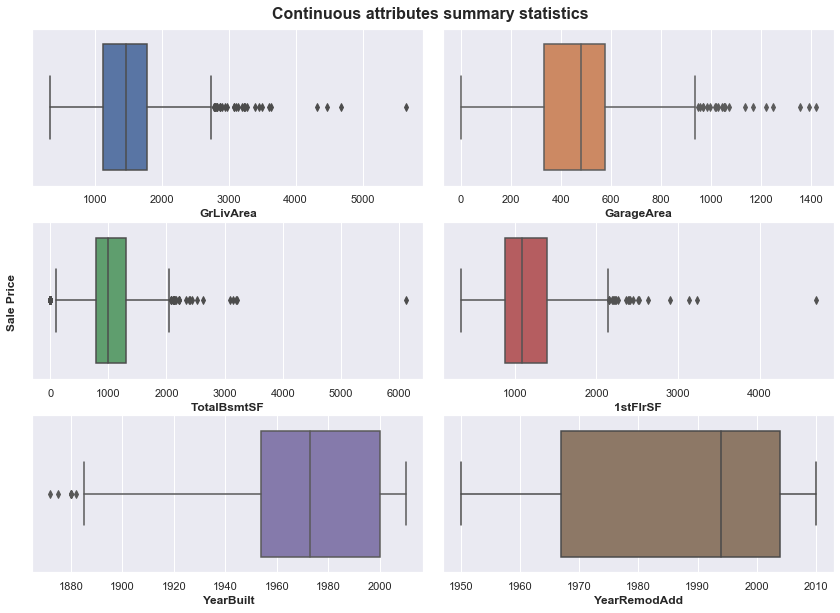

In [144]:
i = j = k = 0
fig, ax = plt.subplots(3,2, figsize=(14,10), sharey=False)
fig.suptitle('Continuous attributes summary statistics', fontsize=16, fontweight='bold', y=0.91)
fig.subplots_adjust(hspace=0.23, wspace=0.05, left=0.105)
fig.text(0.08, 0.5, 'Sale Price', va='center', rotation=90, fontdict={'fontsize':12, 'fontweight':'bold'})
for attr in continuous_attr_high:
    sns.boxplot(x=attr, data=train_clean, ax=ax[i,j], color=sns.color_palette()[k])
    ax[i,j].set_xlabel(attr, fontsize=12, fontweight='bold')
    ax[i,j].set_ylabel('')
    if j==1:
        i+=1
        j=0
    else:
        j+=1
    k+=1

### Categorical Data

In [145]:
train_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [146]:
train_cat.shape[1]

39

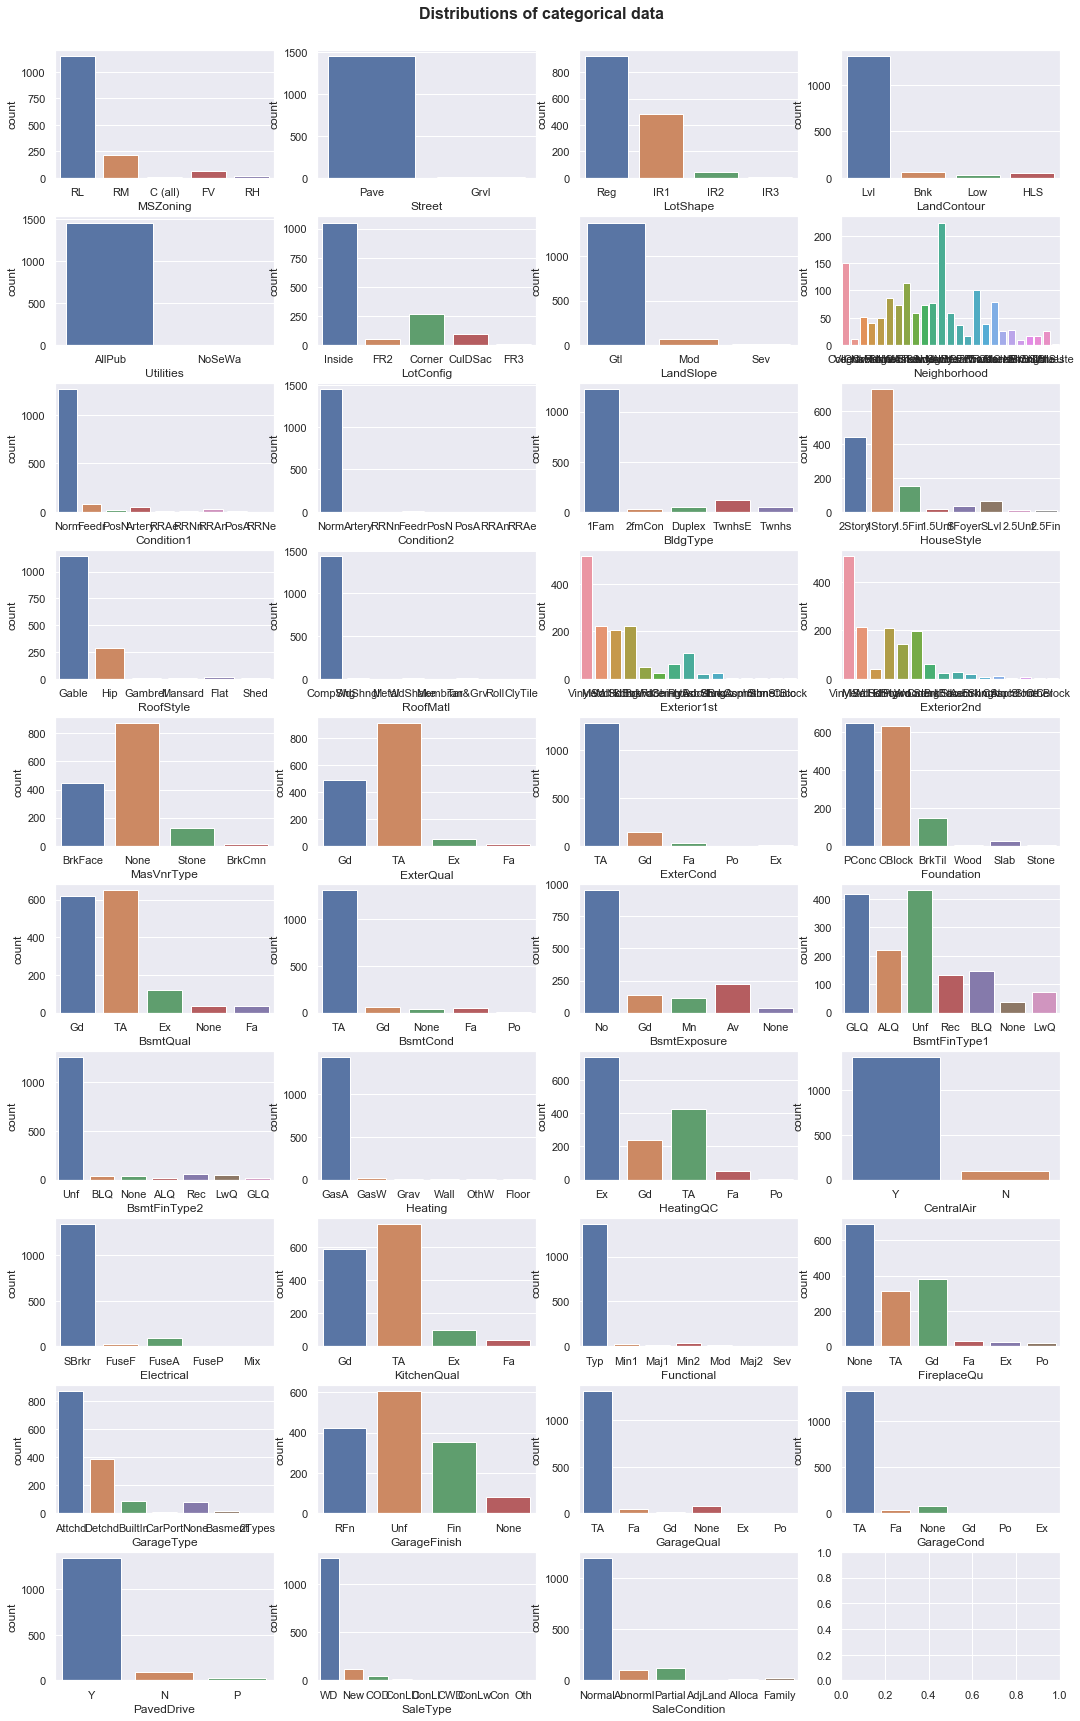

In [151]:
i = j = k = 0
fig, ax = plt.subplots(10,4, figsize=(18,30))
fig.suptitle('Distributions of categorical data', fontsize=16, fontweight = 'bold', y=0.9)
fig.subplots_adjust(hspace=0.3)
for attr in train_cat.columns:
    sns.countplot(x=attr, data=train_clean, ax=ax[i,j])
    if j==3:
        i+=1
        j=0
    else:
        j+=1
    k+=1

In [152]:
train_cat.shape[1]/3

13.0

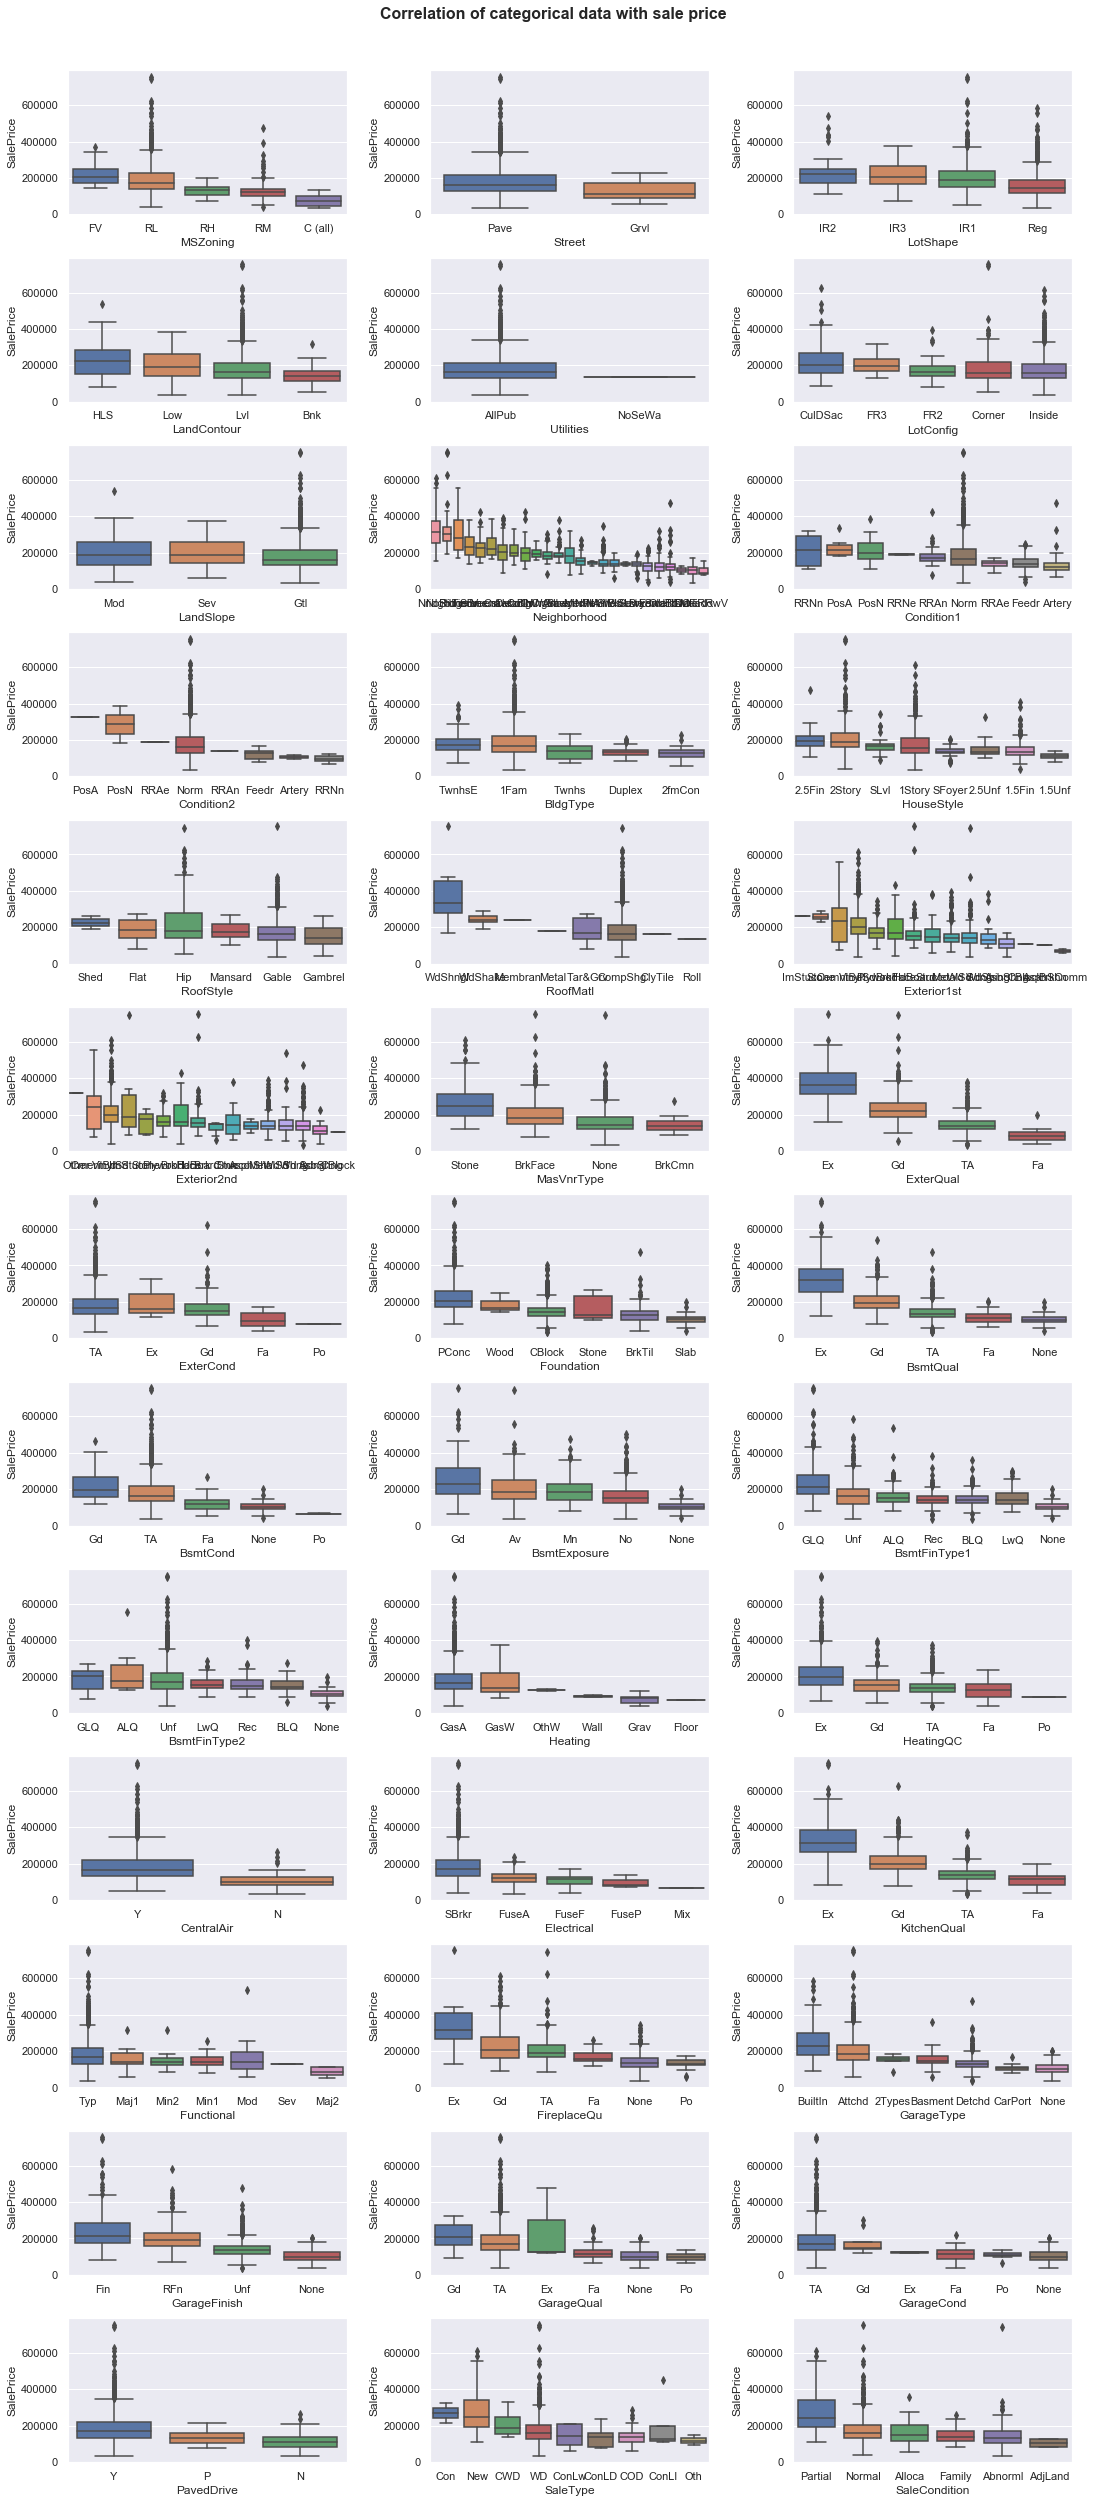

In [153]:
i = j = k = 0
fig, ax = plt.subplots(13,3, figsize=(18,44))
fig.suptitle('Correlation of categorical data with sale price', fontsize=16, fontweight = 'bold', y=0.9)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for attr in train_cat.columns:
    #sort median values of each attribute descending
    aa = train_clean.groupby(attr).median()['SalePrice'].sort_values(ascending=False).index
    sns.boxplot(x=attr, y='SalePrice', data=train_clean, ax=ax[i,j], order=aa)
    if j==2:
        i+=1
        j=0
    else:
        j+=1
    k+=1

#### Zoom in to features that look like having a 'high' correlation with sale price

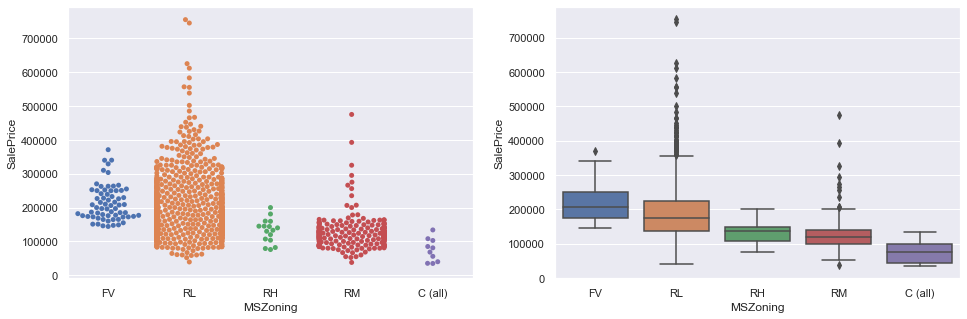

In [191]:
aa = train_clean.groupby('MSZoning').median().SalePrice.sort_values(ascending=False).index
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.swarmplot(x='MSZoning', y='SalePrice', data=train_clean, order=aa)
plt.subplot(1,2,2)
sns.boxplot(x='MSZoning', y='SalePrice', data=train_clean, order=aa);

It seems that the MSZoning plays a role in the sale price.

The MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

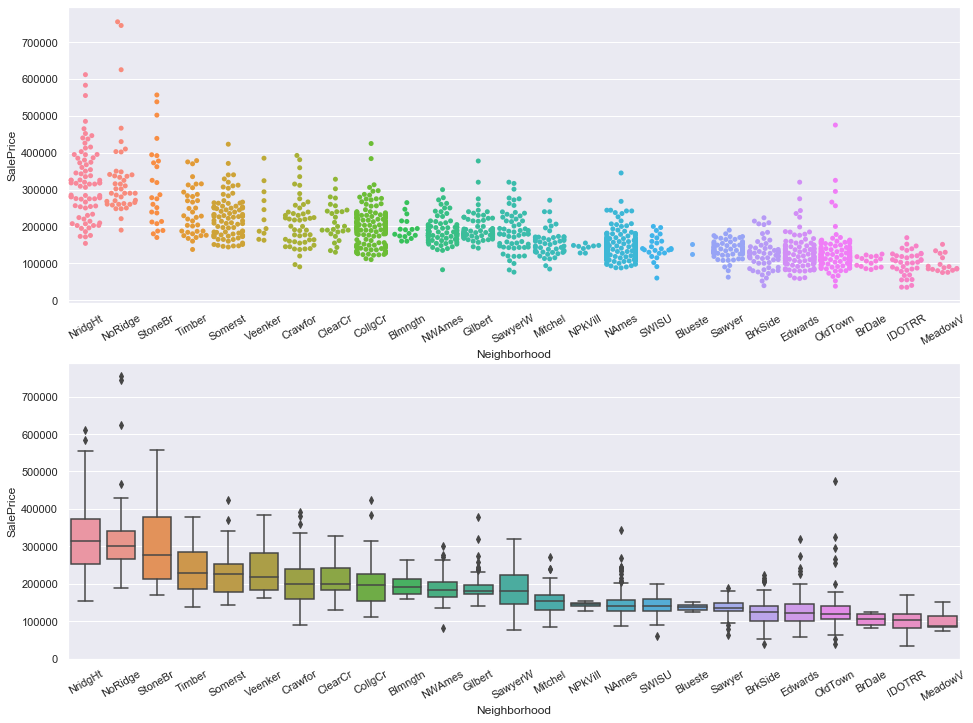

In [199]:
aa = train_clean.groupby('Neighborhood').median().SalePrice.sort_values(ascending=False).index
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
sns.swarmplot(x='Neighborhood', y='SalePrice', data=train_clean, order=aa)
plt.xticks(rotation=30)
plt.subplot(2,1,2)
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_clean, order=aa)
plt.xticks(rotation=30);

It seems that the Neighborhood affets the sale price.

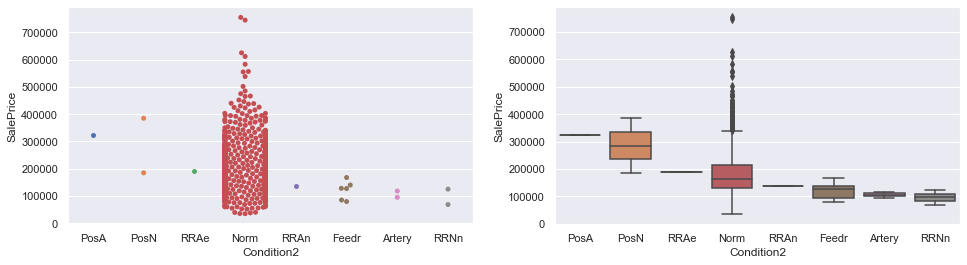

In [200]:
aa = train_clean.groupby('Condition2').median().SalePrice.sort_values(ascending=False).index
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.swarmplot(x='Condition2', y='SalePrice', data=train_clean, order=aa)
plt.subplot(1,2,2)
sns.boxplot(x='Condition2', y='SalePrice', data=train_clean, order=aa);

The condition 2 - Proximity to various conditions (if more than one is present) - does not seem to play a role since most houses do not have a second condition and they are normal.

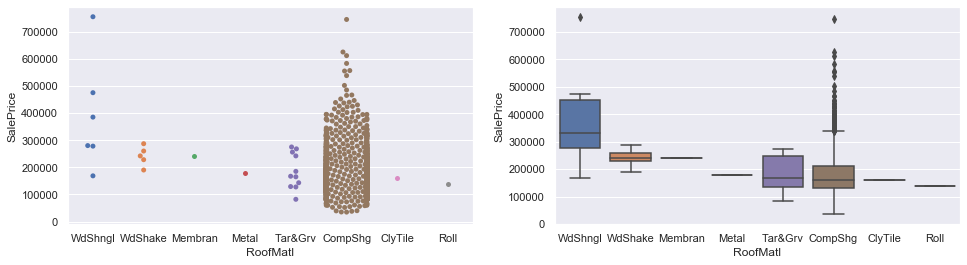

In [201]:
aa = train_clean.groupby('RoofMatl').median().SalePrice.sort_values(ascending=False).index
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.swarmplot(x='RoofMatl', y='SalePrice', data=train_clean, order=aa)
plt.subplot(1,2,2)
sns.boxplot(x='RoofMatl', y='SalePrice', data=train_clean, order=aa);

The RoofMatl: Roof material values are mostly concentrated to one category. It looks like Wood Shingles have a high median but only a few houses use that material for their roofs.

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

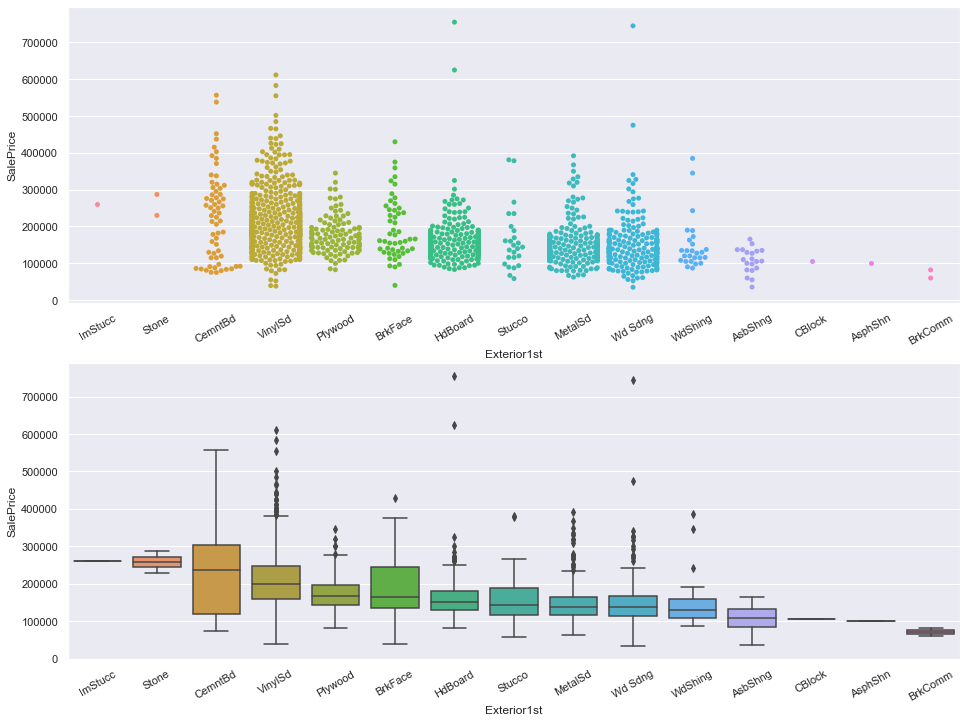

In [202]:
aa = train_clean.groupby('Exterior1st').median().SalePrice.sort_values(ascending=False).index
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
sns.swarmplot(x='Exterior1st', y='SalePrice', data=train_clean, order=aa)
plt.xticks(rotation=30)
plt.subplot(2,1,2)
sns.boxplot(x='Exterior1st', y='SalePrice', data=train_clean, order=aa)
plt.xticks(rotation=30);

Exterior1st: Exterior covering on house it seems to affect the sale price.

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

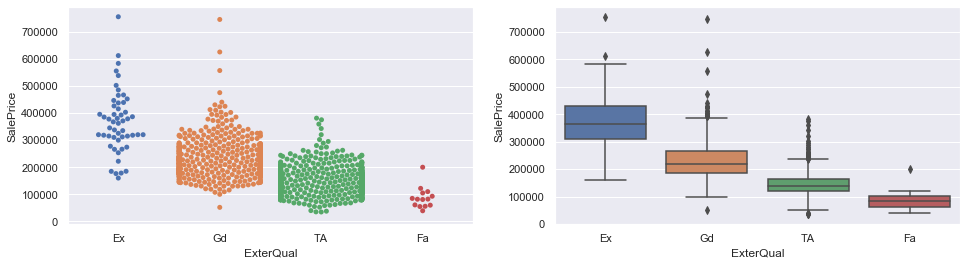

In [203]:
aa = train_clean.groupby('ExterQual').median().SalePrice.sort_values(ascending=False).index
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.swarmplot(x='ExterQual', y='SalePrice', data=train_clean, order=aa)
plt.subplot(1,2,2)
sns.boxplot(x='ExterQual', y='SalePrice', data=train_clean, order=aa);

ExterQual: Evaluates the quality of the material on the exterior. It seems that it highly affects the sale price.
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

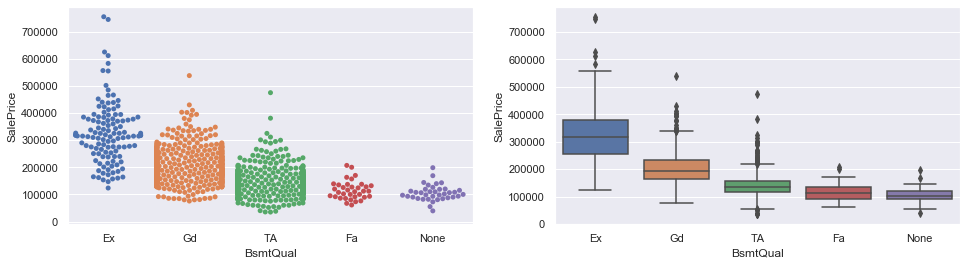

In [204]:
aa = train_clean.groupby('BsmtQual').median().SalePrice.sort_values(ascending=False).index
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.swarmplot(x='BsmtQual', y='SalePrice', data=train_clean, order=aa)
plt.subplot(1,2,2)
sns.boxplot(x='BsmtQual', y='SalePrice', data=train_clean, order=aa);

BsmtQual: Evaluates the height of the basement. It also highly affects the sale price.

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       None	No Basement

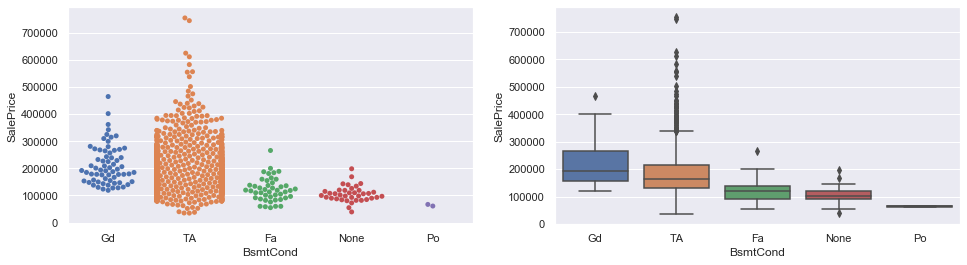

In [205]:
aa = train_clean.groupby('BsmtCond').median().SalePrice.sort_values(ascending=False).index
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.swarmplot(x='BsmtCond', y='SalePrice', data=train_clean, order=aa)
plt.subplot(1,2,2)
sns.boxplot(x='BsmtCond', y='SalePrice', data=train_clean, order=aa);

BsmtCond: Evaluates the general condition of the basement. It also affects the sale price but not as much as the basement height.

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       None	No Basement

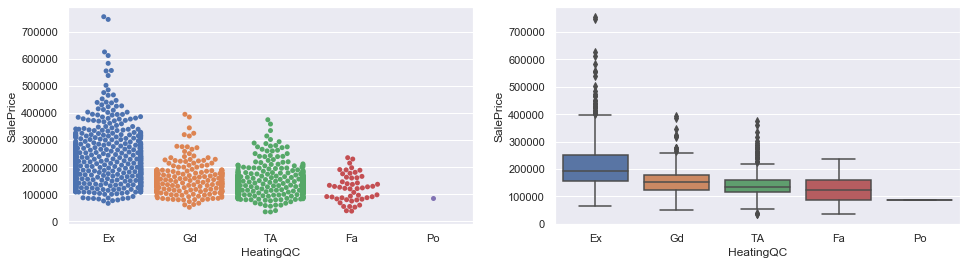

In [206]:
aa = train_clean.groupby('HeatingQC').median().SalePrice.sort_values(ascending=False).index
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.swarmplot(x='HeatingQC', y='SalePrice', data=train_clean, order=aa)
plt.subplot(1,2,2)
sns.boxplot(x='HeatingQC', y='SalePrice', data=train_clean, order=aa);

There is also a correlation for the HeatingQC: Heating quality and condition.

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

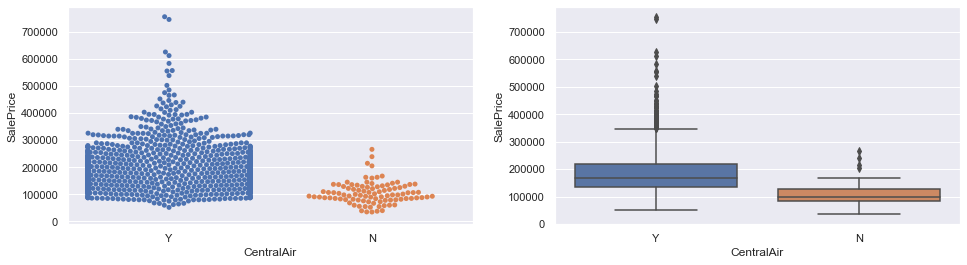

In [207]:
aa = train_clean.groupby('CentralAir').median().SalePrice.sort_values(ascending=False).index
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.swarmplot(x='CentralAir', y='SalePrice', data=train_clean, order=aa)
plt.subplot(1,2,2)
sns.boxplot(x='CentralAir', y='SalePrice', data=train_clean, order=aa);

CentralAir: Central air conditioning also affects the sale price.

       N	No
       Y	Yes

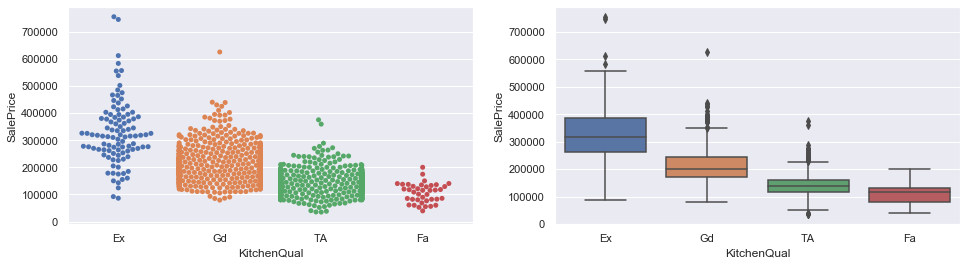

In [208]:
aa = train_clean.groupby('KitchenQual').median().SalePrice.sort_values(ascending=False).index
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.swarmplot(x='KitchenQual', y='SalePrice', data=train_clean, order=aa)
plt.subplot(1,2,2)
sns.boxplot(x='KitchenQual', y='SalePrice', data=train_clean, order=aa);

KitchenQual: Kitchen quality highly affects the sale price.

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

#### Other types of graphs

In [161]:
aa = train_clean.groupby('MSZoning').median()['SalePrice'].sort_values(ascending=False)

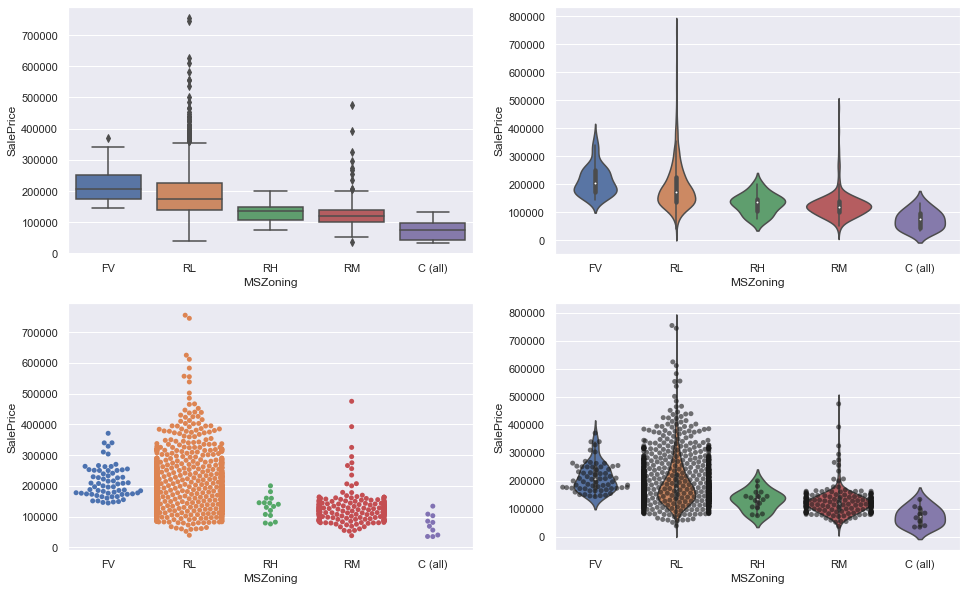

In [162]:
plt.figure(figsize=(16,10))
plt.subplot(221)
sns.boxplot(x='MSZoning', y='SalePrice', data=train_clean, order=aa.index)
plt.subplot(222)
sns.violinplot(x='MSZoning', y='SalePrice', data=train_clean, order=aa.index)
plt.subplot(223)
sns.swarmplot(x='MSZoning', y='SalePrice', data=train_clean, order=aa.index)
plt.subplot(224)
sns.violinplot(x='MSZoning', y='SalePrice', data=train_clean, order=aa.index)
sns.swarmplot(x='MSZoning', y='SalePrice', data=train_clean, order=aa.index, color ='k', alpha=0.6);

In [171]:
train_clean.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [178]:
cat_feat_median_list = []
for i in train_clean.Neighborhood.unique():
    a = train_clean[train_clean.Neighborhood==i].SalePrice.median()
    cat_feat_median_list.append(['Neighborhood',a])

In [188]:
max(cat_feat_median_list), min(cat_feat_median_list)

(['Neighborhood', 315000.0], ['Neighborhood', 88000.0])

#### Mutlivariate

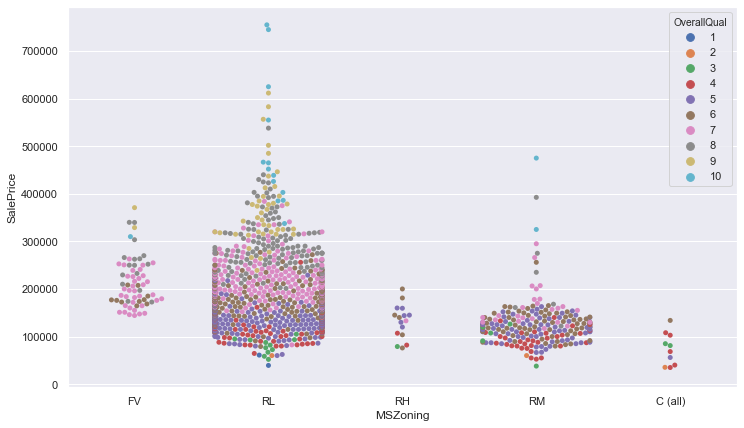

In [163]:
plt.figure(figsize=(12,7))
sns.swarmplot(x='MSZoning', y='SalePrice', data=train_clean, order=aa.index, hue='OverallQual');

TODO
- Fix NaN values / missing values
- Replace category names with numbers -> check correlation -> also explore with names and compare
- Explore correlation
- Multivariate exploration
- Treat outliers (later run analysis with and without outliers)
- Check median/mean values for categorical data and find the highest ones
- Check the sale price feature
- Skewed features

- Apply the feature engineering to both train and test sets

#### Skeweness - Numeric Data

In [83]:
train_clean.skew().sort_values(ascending=False).head()

MiscVal         24.476794
PoolArea        14.828374
LotArea         12.207688
3SsnPorch       10.304342
LowQualFinSF     9.011341
dtype: float64

In [84]:
train_clean.skew().sort_values(ascending=False).tail()

FullBath        0.036562
GarageCars     -0.342549
YearRemodAdd   -0.503562
YearBuilt      -0.613461
GarageYrBlt    -0.649415
dtype: float64

## Random

In [ ]:
train.iloc[:,0:5].head()

In [ ]:
# diagonal shows the distribution, the rest show scatter plots between 2 variables
sb.pairplot(train[['MSSubClass', 'LotFrontage']]);

In [ ]:
# nothing is equal to np.nan!!!
# https://stackoverflow.com/questions/41342609/the-difference-between-comparison-to-np-nan-and-isnull
np.nan == np.nan

In [ ]:
# sb dist can't plot nan values
#sb.distplot(train.GarageYrBlt);

In [ ]:
plt.hist(train.GarageYrBlt);

In [ ]:
# Find numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train_num = train.select_dtypes(include=numerics)

#numeric_features = train.select_dtypes(include=[np.number])
#numeric_features.columns

In [ ]:
correlated = train.corr()
correlated[((correlated>0.6) | (correlated<-0.6)) & (correlated!=1)]
correlated[((correlated>0.6) | (correlated<-0.6)) & (correlated!=1)].count().sort_values(ascending=False)
plt.figure(figsize=(12,6))
#sb.heatmap(correlated);
sb.heatmap(correlated[((correlated>0.5) | (correlated<-0.5)) & (correlated!=1)]);

In [ ]:
plt.bar(train_clean.MSZoning.value_counts().index, train_clean.MSZoning.value_counts().values);